# INN Hotels Project

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing the necessary libraries

In [361]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [362]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Import Dataset

In [363]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [364]:
hotel = pd.read_csv('/content/INNHotelsGroup.csv') ##  Fill the blank to read the data

In [365]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [366]:
data.head() ##  Complete the code to view top 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.00000,2017.00000,10.00000,2.00000,Offline,0.00000,0.00000,0.00000,65.00000,0.00000,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5.00000,2018.00000,11.00000,6.00000,Online,0.00000,0.00000,0.00000,106.68000,1.00000,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.00000,2018.00000,2.00000,28.00000,Online,0.00000,0.00000,0.00000,60.00000,0.00000,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.00000,2018.00000,5.00000,20.00000,Online,0.00000,0.00000,0.00000,100.00000,0.00000,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48.00000,2018.00000,4.00000,11.00000,Online,0.00000,0.00000,0.00000,94.50000,0.00000,Canceled


In [367]:
data.tail() ##  Complete the code to view last 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
23469,INN23470,1,0,0,1,Meal Plan 1,0,Room_Type 1,2.00000,2018.00000,11.00000,25.00000,Corporate,0.00000,0.00000,0.00000,67.00000,0.00000,Not_Canceled
23470,INN23471,2,0,2,2,Meal Plan 1,0,Room_Type 4,32.00000,2018.00000,9.00000,25.00000,Online,0.00000,0.00000,0.00000,134.78000,1.00000,Not_Canceled
23471,INN23472,1,0,1,4,Meal Plan 1,0,Room_Type 1,23.00000,2017.00000,8.00000,31.00000,Online,0.00000,0.00000,0.00000,92.00000,1.00000,Not_Canceled
23472,INN23473,2,0,2,1,Meal Plan 2,0,Room_Type 1,145.00000,2017.00000,8.00000,29.00000,Offline,0.00000,0.00000,0.00000,94.50000,0.00000,Canceled
23473,INN23474,3,0,1,3,Meal Plan 1,0,Room_Type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understand the shape of the dataset

In [368]:
data.shape ##  Complete the code to view dimensions of the data

(23474, 19)

### Check the data types of the columns for the dataset

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            23474 non-null  object 
 1   no_of_adults                          23474 non-null  int64  
 2   no_of_children                        23474 non-null  int64  
 3   no_of_weekend_nights                  23474 non-null  int64  
 4   no_of_week_nights                     23474 non-null  int64  
 5   type_of_meal_plan                     23474 non-null  object 
 6   required_car_parking_space            23474 non-null  int64  
 7   room_type_reserved                    23474 non-null  object 
 8   lead_time                             23473 non-null  float64
 9   arrival_year                          23473 non-null  float64
 10  arrival_month                         23473 non-null  float64
 11  arrival_date   

In [370]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

**Let's drop the Booking_ID column first before we proceed forward**.

In [371]:
#Drop Booking-ID so we can move foward
data.drop('Booking_ID',axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.00000,2017.00000,10.00000,2.00000,Offline,0.00000,0.00000,0.00000,65.00000,0.00000,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5.00000,2018.00000,11.00000,6.00000,Online,0.00000,0.00000,0.00000,106.68000,1.00000,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.00000,2018.00000,2.00000,28.00000,Online,0.00000,0.00000,0.00000,60.00000,0.00000,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.00000,2018.00000,5.00000,20.00000,Online,0.00000,0.00000,0.00000,100.00000,0.00000,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48.00000,2018.00000,4.00000,11.00000,Online,0.00000,0.00000,0.00000,94.50000,0.00000,Canceled


## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [372]:
data.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
no_of_adults,23474.00000,1.84847,0.51724,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,23474.00000,0.10471,0.40502,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,23474.00000,0.81388,0.87237,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,23474.00000,2.20597,1.41378,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,23474.00000,0.03169,0.17519,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,23473.00000,85.30435,86.03944,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,23473.00000,2017.82282,0.38183,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,23473.00000,7.43211,3.06267,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,23473.00000,15.57521,8.73269,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,23473.00000,0.02573,0.15834,0.00000,0.00000,0.00000,0.00000,1.00000


Average number of adults is around 2 people per room, while the median is 2, which will probably indicate that this dataset represents a normal distribution
The number of children dataset may contain outliers since the max number of children is 10 and that the mean indicates that most parents do not bring their children with them when they go to stay at a hotel
Average price per room is around $103 and the medianis 99, which may indicate that there is skewness is this part of the graph
Most people have canceled their bookings

### Univariate Analysis

In [373]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on lead time

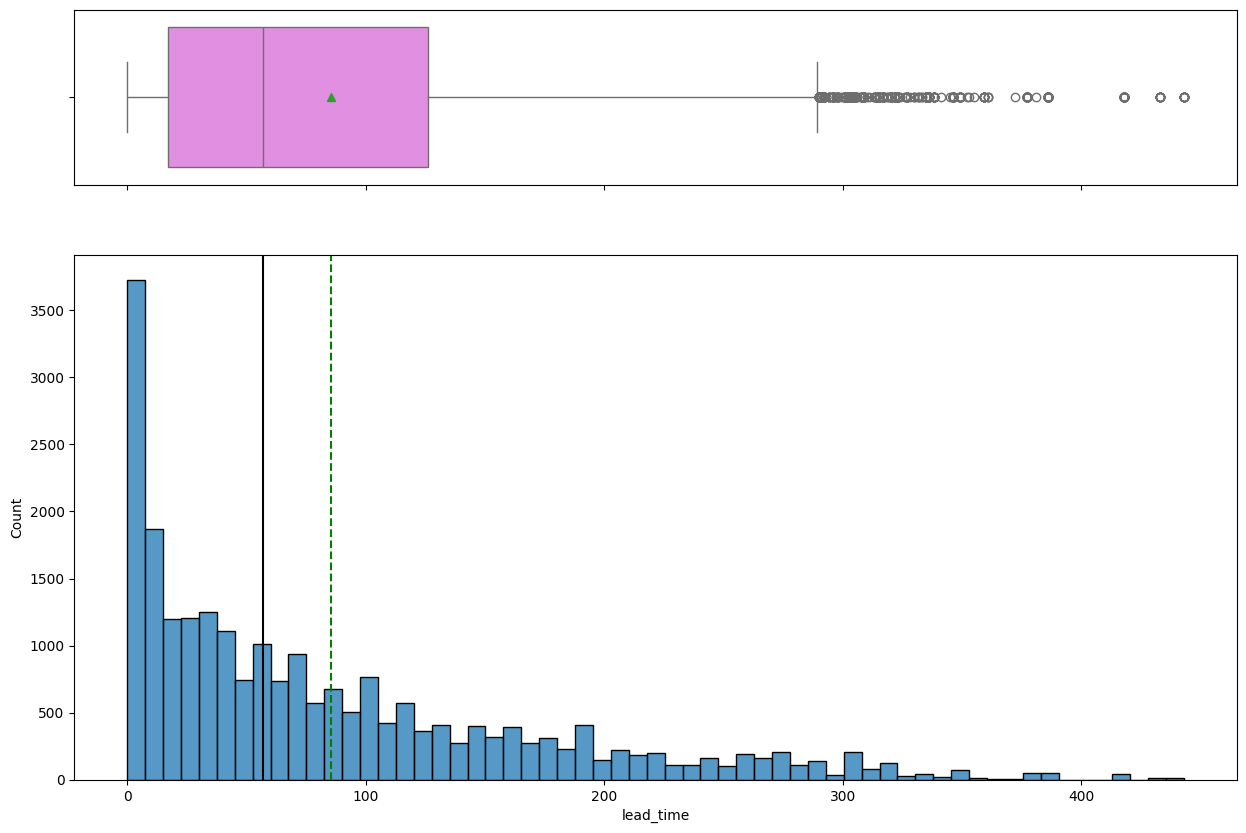

In [374]:
histogram_boxplot(data, "lead_time")

Lead time is showing that it is skewed to the right and that there are many outliers on this graph

### Observations on average price per room

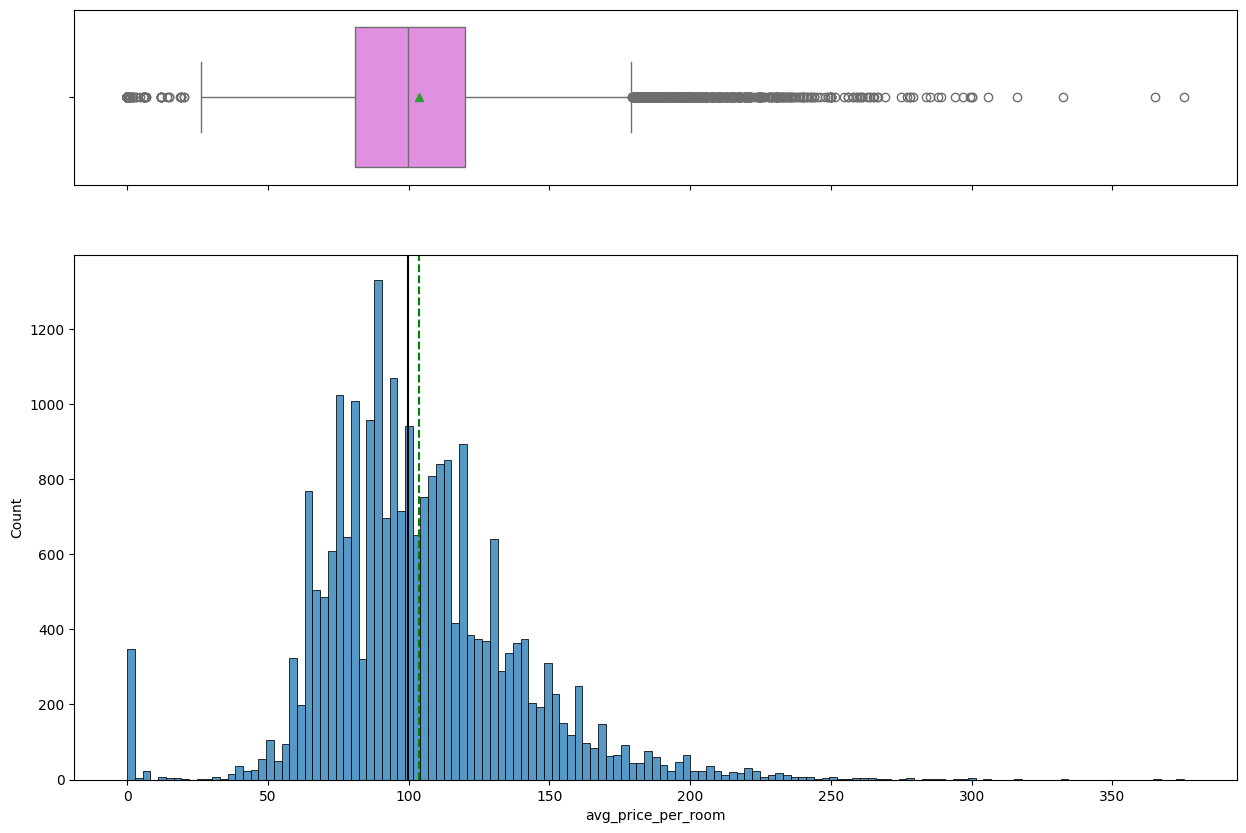

In [375]:
histogram_boxplot(data, "avg_price_per_room")  ## Complete the code to create histogram_boxplot for average price per room

This shows that the data for this category is approximately normal with many outliers

In [376]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2.00000,2017.00000,9.00000,10.00000,Complementary,0.00000,0.00000,0.00000,0.00000,1.00000,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13.00000,2018.00000,6.00000,1.00000,Complementary,1.00000,3.00000,5.00000,0.00000,1.00000,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4.00000,2018.00000,2.00000,27.00000,Complementary,0.00000,0.00000,0.00000,0.00000,1.00000,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1.00000,2017.00000,8.00000,12.00000,Complementary,1.00000,0.00000,1.00000,0.00000,1.00000,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4.00000,2017.00000,8.00000,23.00000,Complementary,0.00000,0.00000,0.00000,0.00000,1.00000,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23271,2,0,0,2,Meal Plan 1,0,Room_Type 1,0.00000,2018.00000,3.00000,29.00000,Complementary,0.00000,0.00000,0.00000,0.00000,1.00000,Not_Canceled
23291,2,0,0,1,Meal Plan 2,0,Room_Type 6,1.00000,2018.00000,12.00000,15.00000,Complementary,1.00000,0.00000,3.00000,0.00000,1.00000,Not_Canceled
23313,1,0,0,1,Meal Plan 1,0,Room_Type 1,0.00000,2018.00000,5.00000,25.00000,Complementary,1.00000,2.00000,4.00000,0.00000,3.00000,Not_Canceled
23366,4,0,0,1,Meal Plan 1,1,Room_Type 7,4.00000,2018.00000,5.00000,13.00000,Complementary,1.00000,0.00000,2.00000,0.00000,4.00000,Not_Canceled


In [377]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

,market_segment_type
Complementary,221
Online,115


In [378]:
#Calculating the 25th quartile of the average room price
Q1 = data['avg_price_per_room'].quantile(0.25)

#Calculating the 75th quartile of the average room price
Q3 = data['avg_price_per_room'].quantile(0.75)

#IQR
IQR = Q3 - Q1

#Calculating the upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.25

In [379]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Observations on number of previous booking cancellations

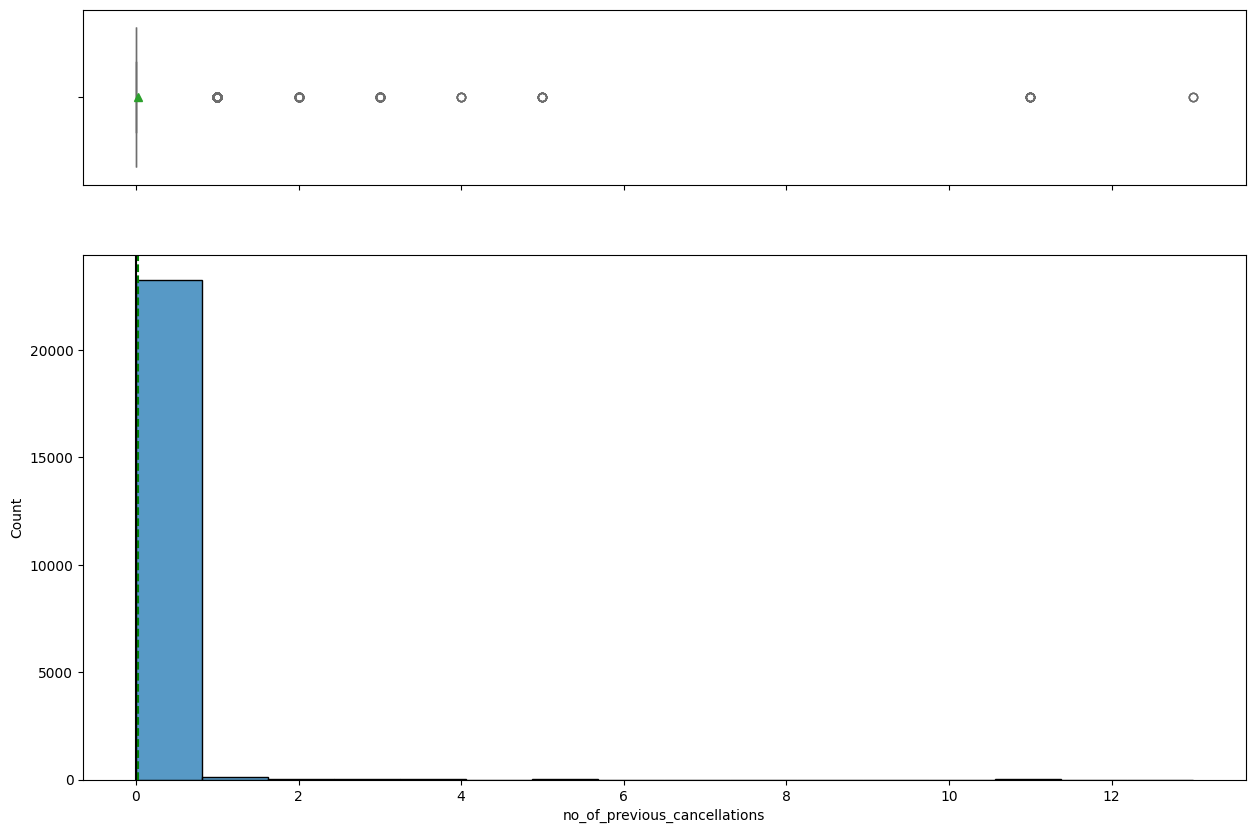

In [380]:
histogram_boxplot(data, "no_of_previous_cancellations")  ## Complete the code to create histogram_boxplot for number of previous booking cancellations

### Observations on number of previous booking not canceled

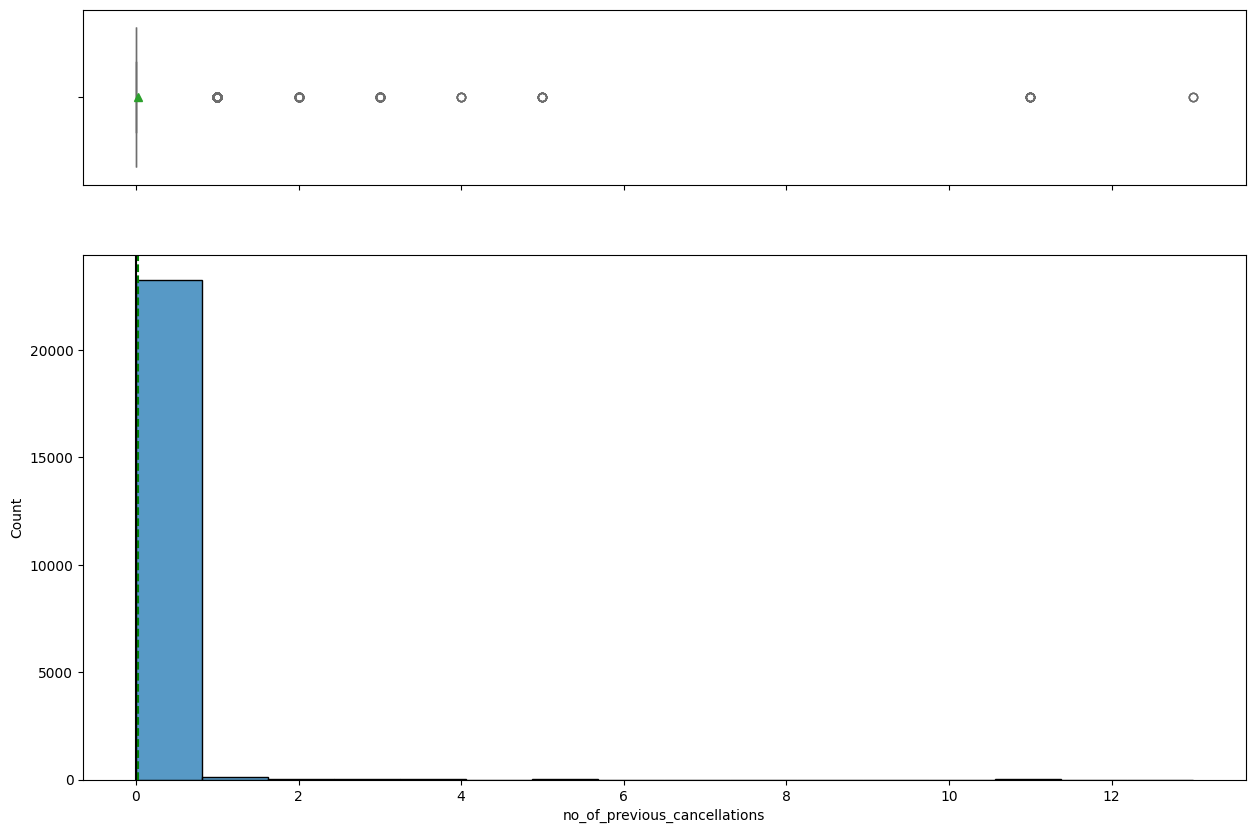

In [381]:
histogram_boxplot(data, "no_of_previous_cancellations" )  ## Complete the code to create histogram_boxplot for number of previous booking not canceled

**Observations on previous bookings not cancelled**

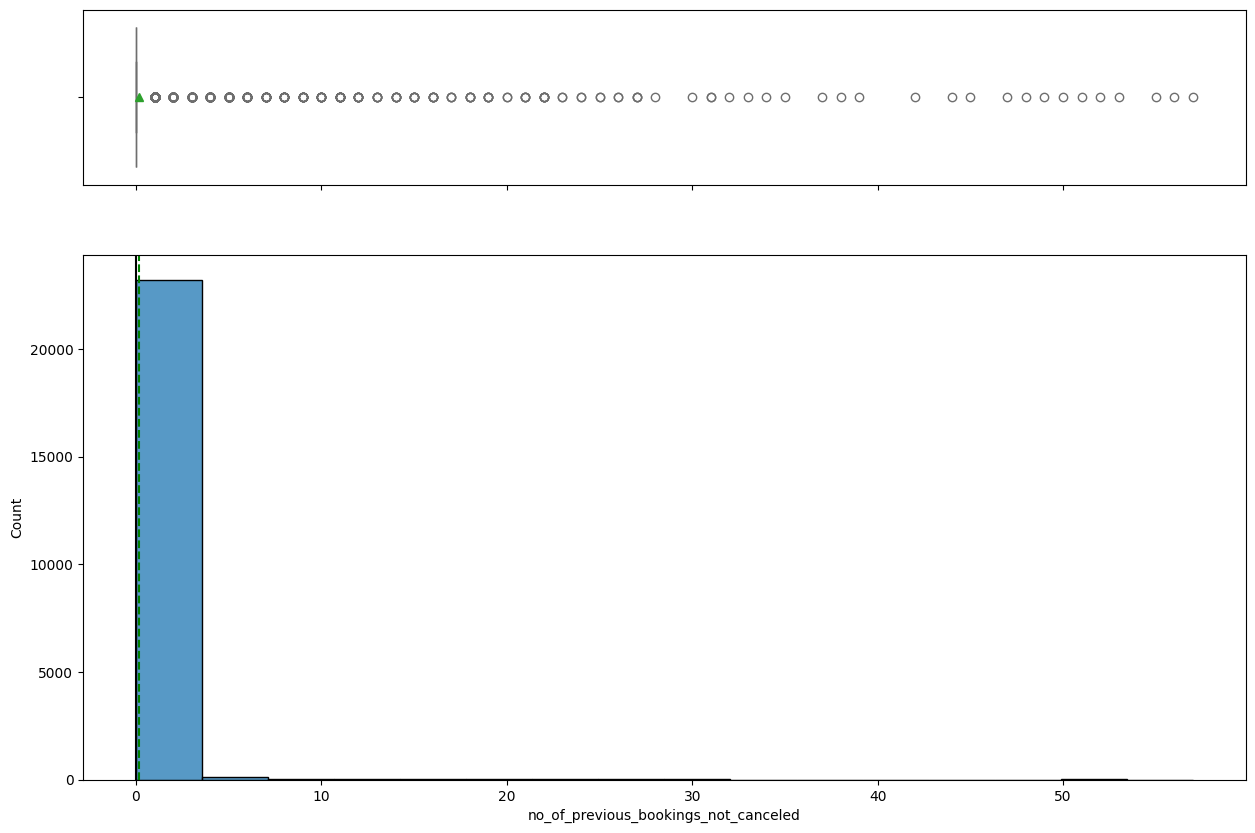

In [382]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled')

In [383]:
#Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    #Removed extra space before for loop
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



### Observations on number of adults

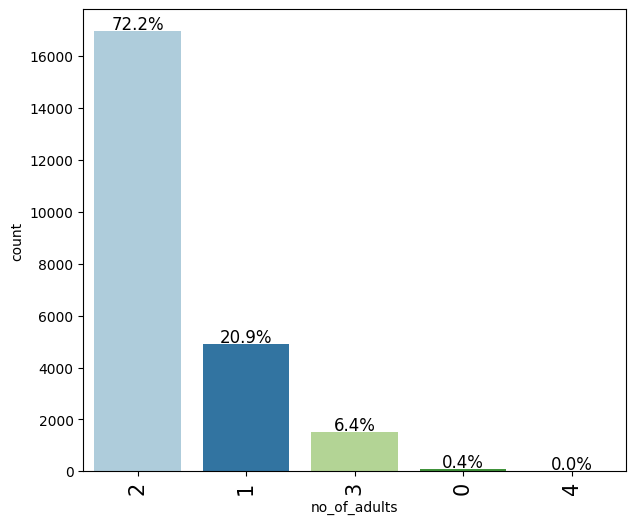

In [384]:
labeled_barplot(data, "no_of_adults", perc=True)

### Observations on number of children

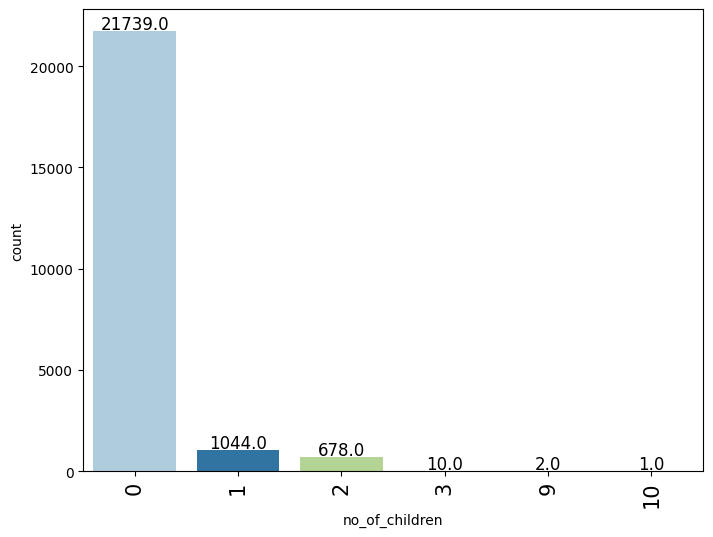

In [385]:
labeled_barplot(data, "no_of_children")  ## Complete the code to create labeled_barplot for number of children

In [386]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Observations on number of week nights

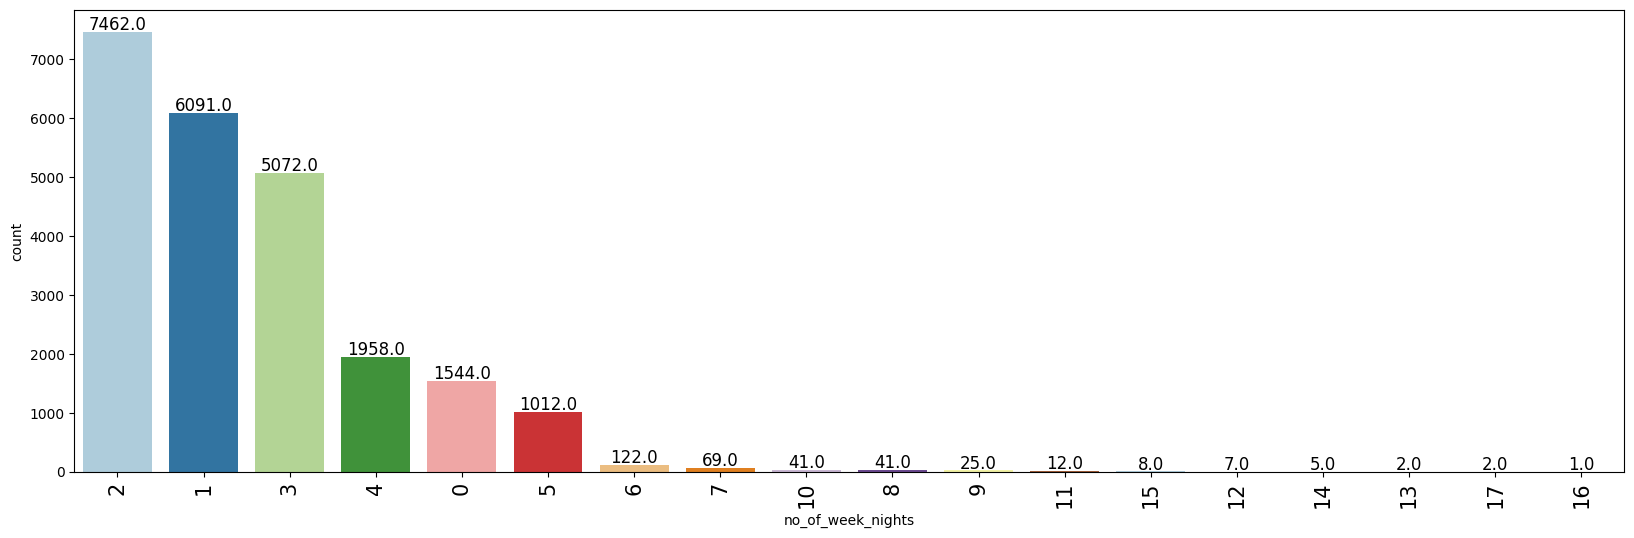

In [387]:
labeled_barplot(data, "no_of_week_nights")  ## Complete the code to create labeled_barplot for number of week nights

### Observations on number of weekend nights

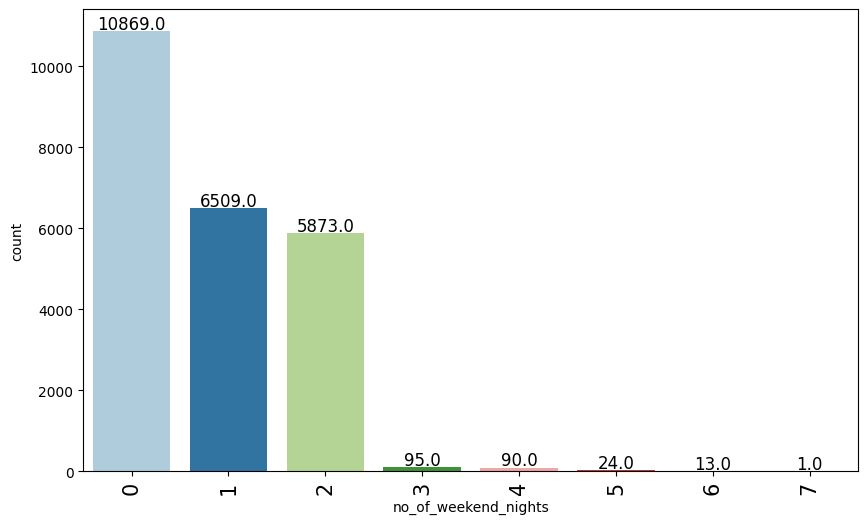

In [388]:
labeled_barplot(data, "no_of_weekend_nights")  ## Complete the code to create labeled_barplot for number of weekend nights

### Observations on required car parking space

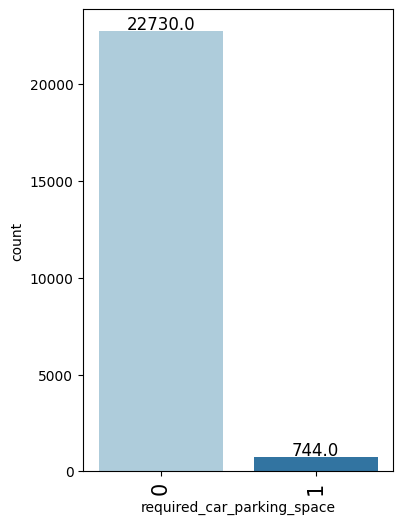

In [389]:
labeled_barplot(data, "required_car_parking_space")  ## Complete the code to create labeled_barplot for car parking space

### Observations on type of meal plan

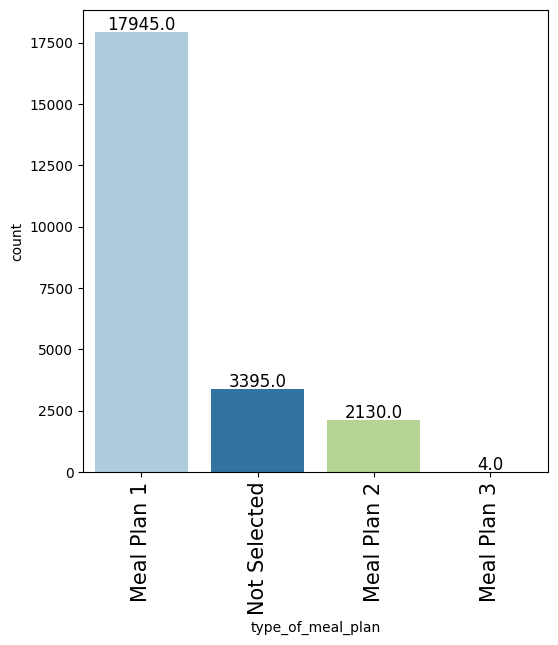

In [390]:
labeled_barplot(data, "type_of_meal_plan")  ## Complete the code to create labeled_barplot for type of mean plan

### Observations on room type reserved

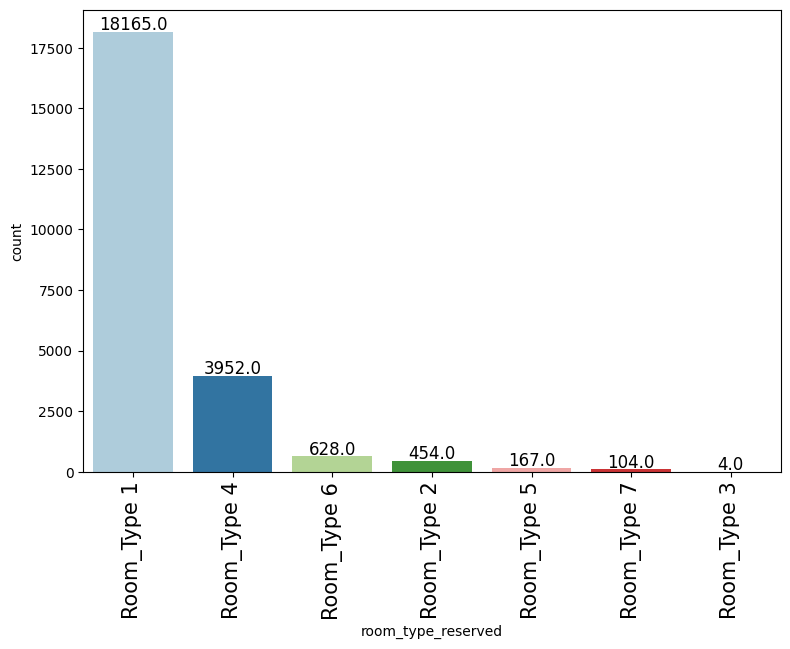

In [391]:
labeled_barplot(data, "room_type_reserved")  ## Complete the code to create labeled_barplot for room type reserved

### Observations on arrival month

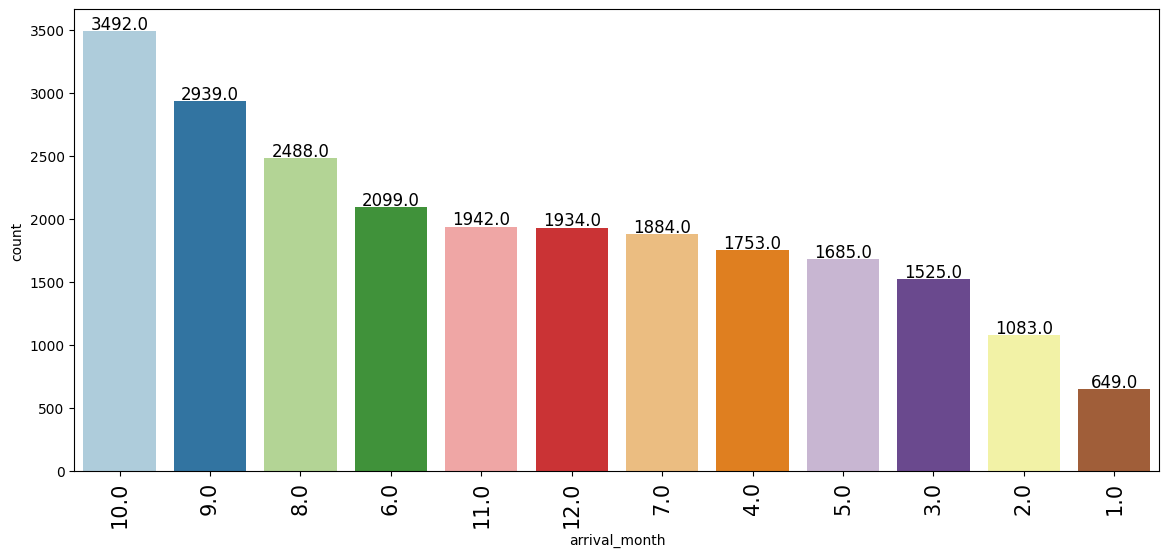

In [392]:
labeled_barplot(data, "arrival_month" )  ## Complete the code to create labeled_barplot for arrival month

### Observations on market segment type

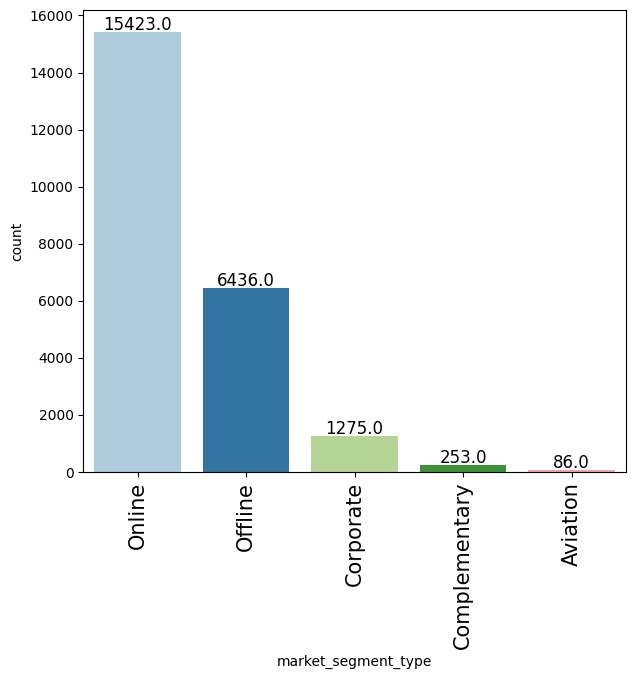

In [393]:
labeled_barplot(data, "market_segment_type")  ## Complete the code to create labeled_barplot for market segment type

### Observations on number of special requests

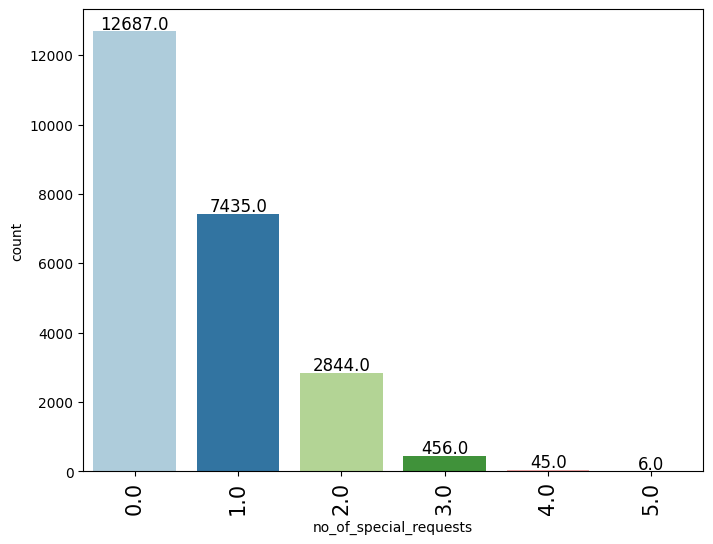

In [394]:
labeled_barplot(data, "no_of_special_requests")  ## Complete the code to create labeled_barplot for number of special requests

### Observations on booking status

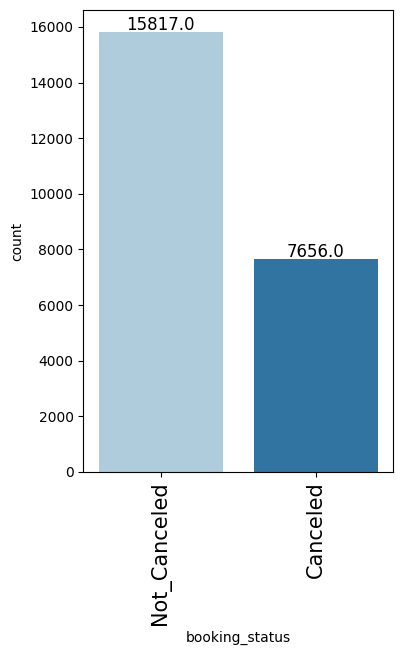

In [395]:
labeled_barplot(data, "booking_status")  ## Complete the code to create labeled_barplot for booking status

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [396]:
#Change Not Cancelled booking to 0 and Cancelled booking as 1 for further analysis
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

### Bivariate Analysis

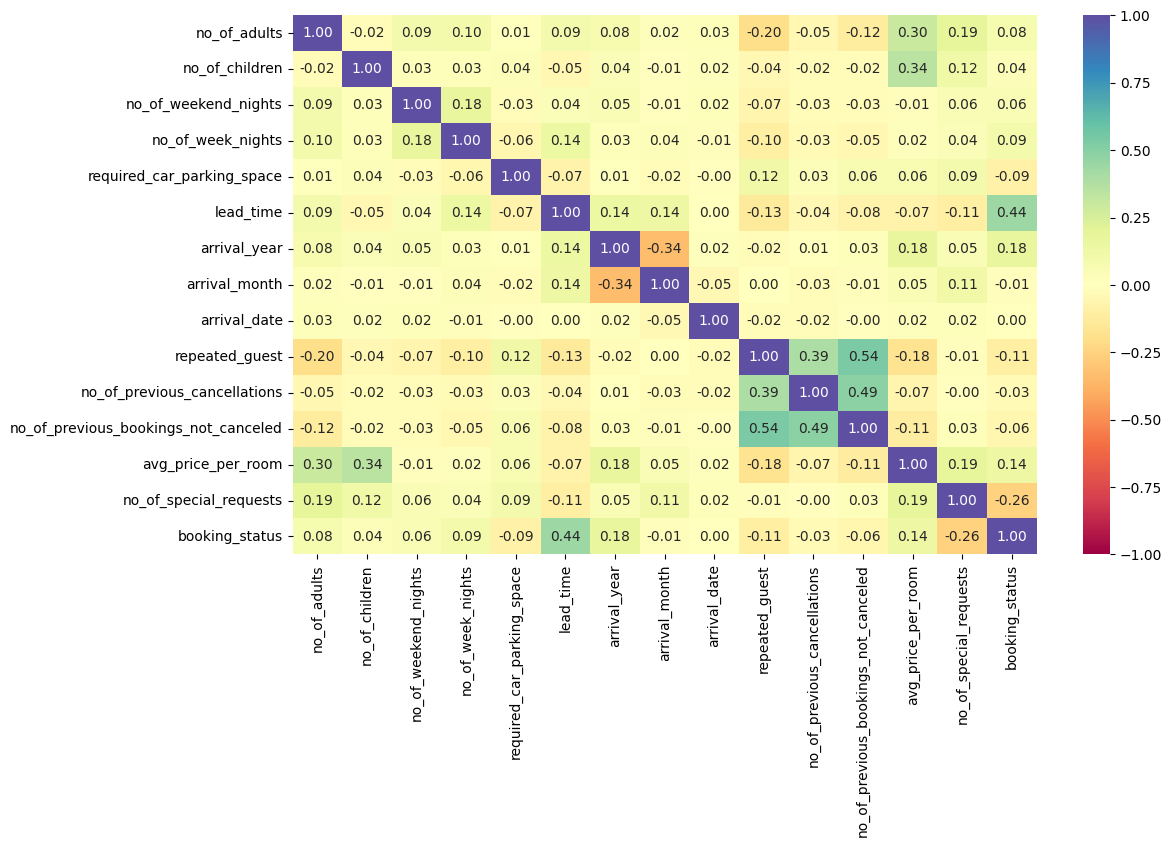

In [397]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,7))
sns.heatmap(data[cols_list].corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

No quantitative variables are correlated with each other besides repeated guests and number of previous bookings not cancelled, which may indicate that there is some brand loyalty when it comes to repeated guests

**Creating functions that will help us with further analysis.**

In [398]:
#Creating functions that will help with further analysis
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [399]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

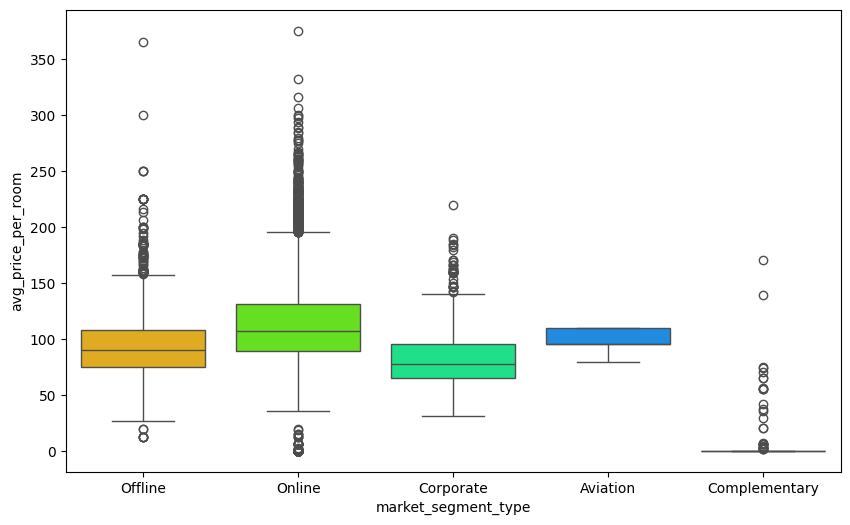

In [400]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')
plt.show()

As hotel prices are very demand heavy as mentioned, online seems to have the highest median price, since online is where the most booking takes place

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0     1    All
market_segment_type                    
All                  15817  7656  23473
Online                9652  5771  15423
Offline               4709  1727   6436
Corporate             1142   133   1275
Aviation                61    25     86
Complementary          253     0    253
------------------------------------------------------------------------------------------------------------------------


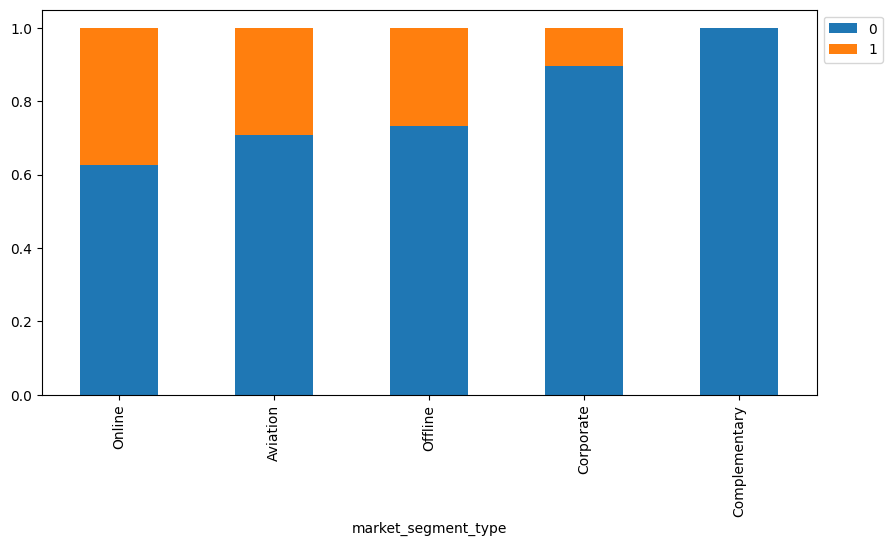

In [401]:
stacked_barplot(data, "market_segment_type", "booking_status")

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0     1    All
no_of_special_requests                    
All                     15817  7656  23473
0.0                      7195  5492  12687
1.0                      5675  1760   7435
2.0                      2440   404   2844
3.0                       456     0    456
4.0                        45     0     45
5.0                         6     0      6
------------------------------------------------------------------------------------------------------------------------


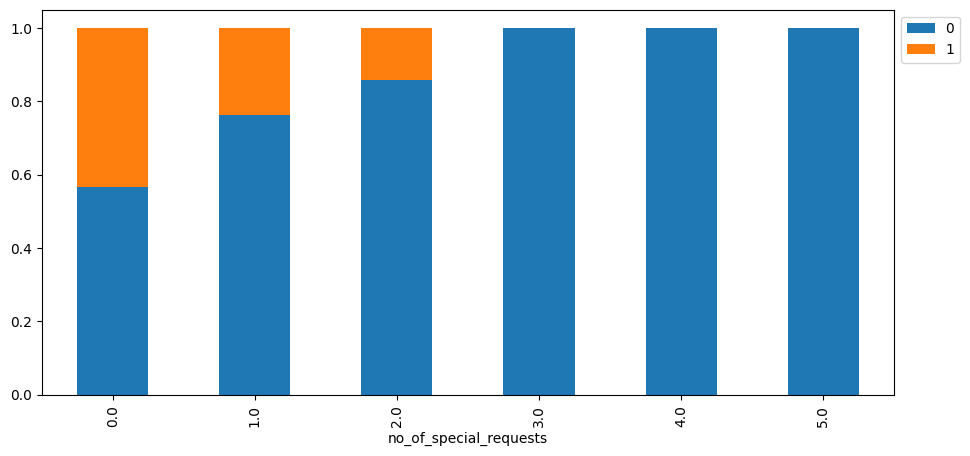

In [402]:
stacked_barplot(data, "no_of_special_requests", "booking_status") ## Complete the code to plot stacked barplot for no of special requests and booking status

When there is no special requests, you can see that there are more more cancellations. When there is more special requests, there is less likelihood of cancellation

**Let's see if the special requests made by the customers impacts the prices of a room**

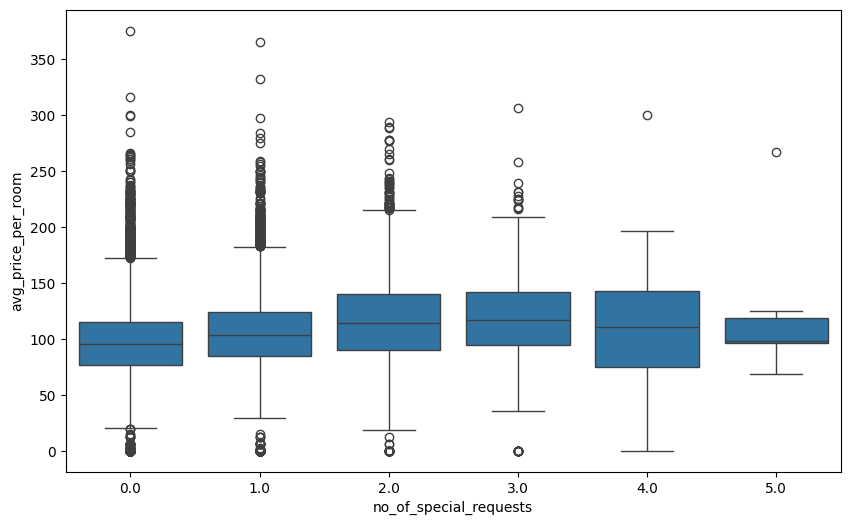

In [403]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room')
plt.show()

The price of the room does not seem to vary too much if there is little requests given, but when there is about 4 or more special requests the price seems to suffer variation

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

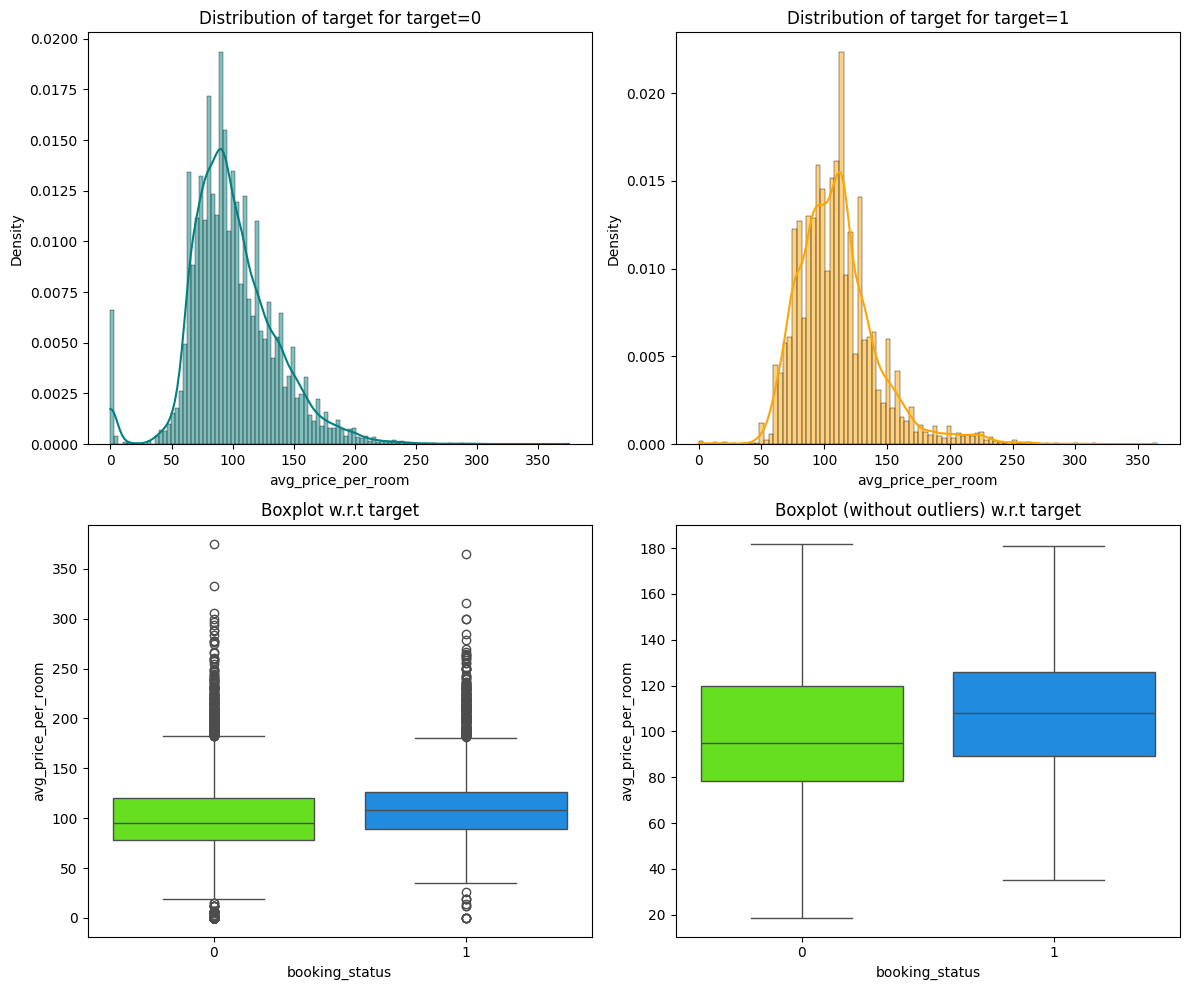

In [404]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

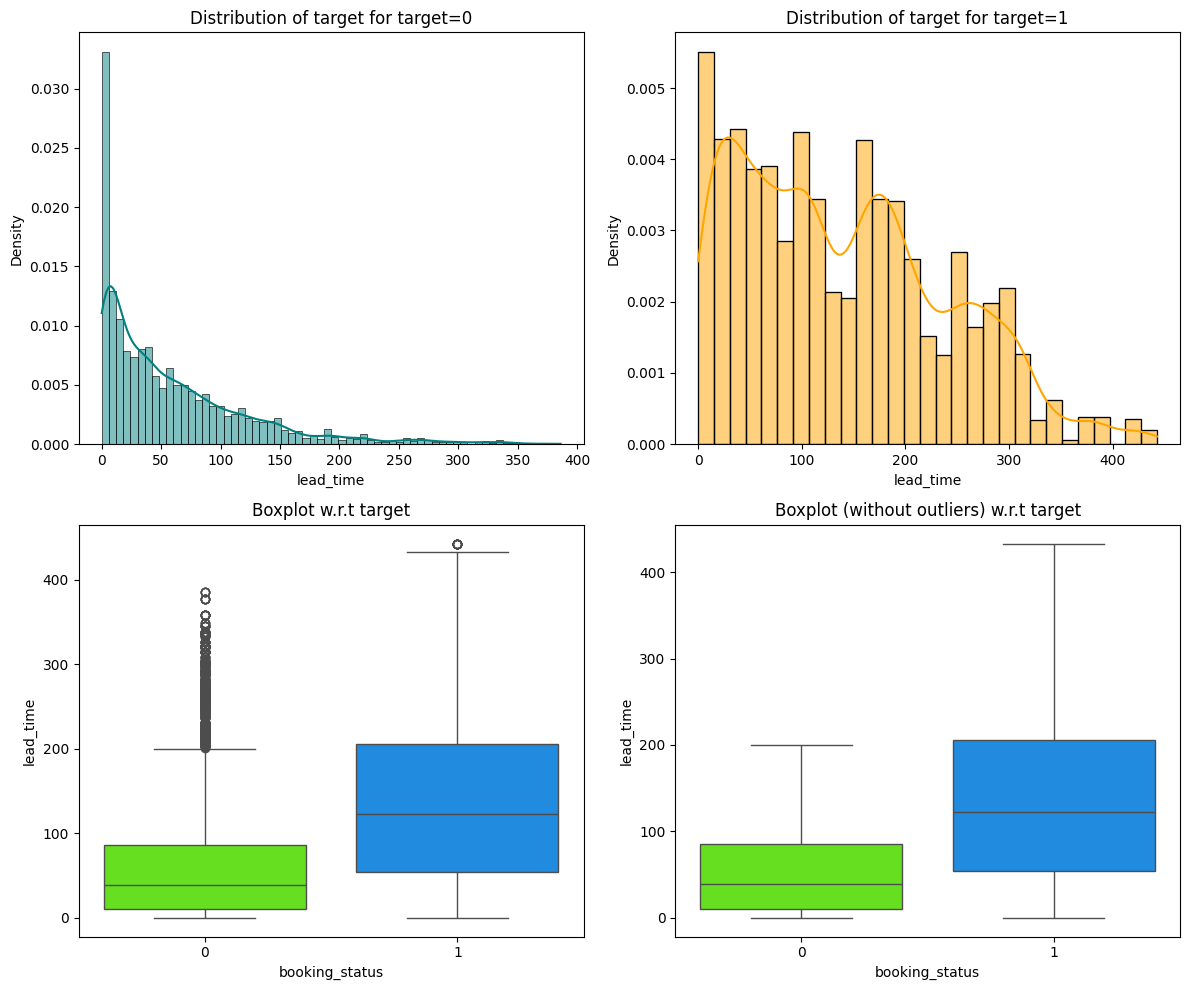

In [405]:
distribution_plot_wrt_target(data, "lead_time", "booking_status" ) ## Complete the code to find distribution of lead time wrt booking status

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [406]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(18479, 18)

In [407]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   12064  6415  18479
2                     10158  5264  15422
3                      1580   890   2470
4                       319   258    577
5                         7     3     10
------------------------------------------------------------------------------------------------------------------------


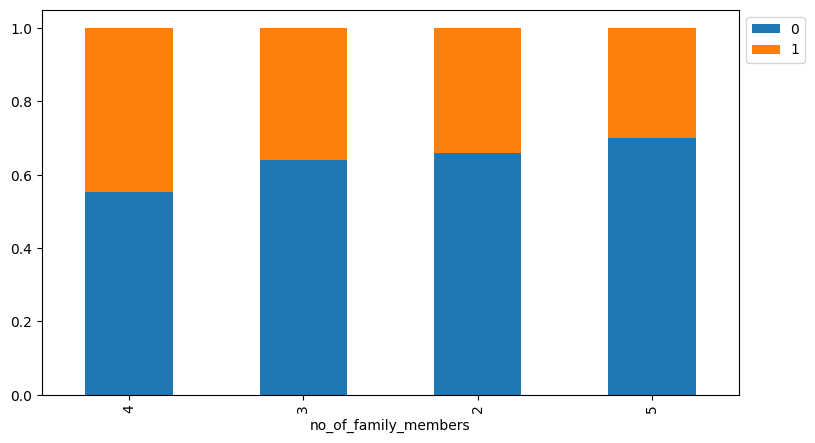

In [408]:
stacked_barplot(family_data, "no_of_family_members", "booking_status") ## Complete the code to plot stacked barplot for no of family members and booking status


There is equally likelihood of cancellation regardless of how many children they have

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [409]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(11106, 18)

In [410]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status     0     1    All
total_days                       
All             7171  3935  11106
3               2432  1400   3832
4               1989   894   2883
5               1019   460   1479
2                844   418   1262
6                354   306    660
7                360   248    608
8                 71    46    117
10                33    36     69
9                 34    33     67
15                 3    20     23
14                 3    17     20
11                15    15     30
12                 7    11     18
13                 1    10     11
20                 2     7      9
17                 1     4      5
19                 0     3      3
21                 1     2      3
16                 1     2      3
18                 0     1      1
22                 0     1      1
24                 0     1      1
23                 1     0      1
--------------------------------------------------------------------------------------------------------------------

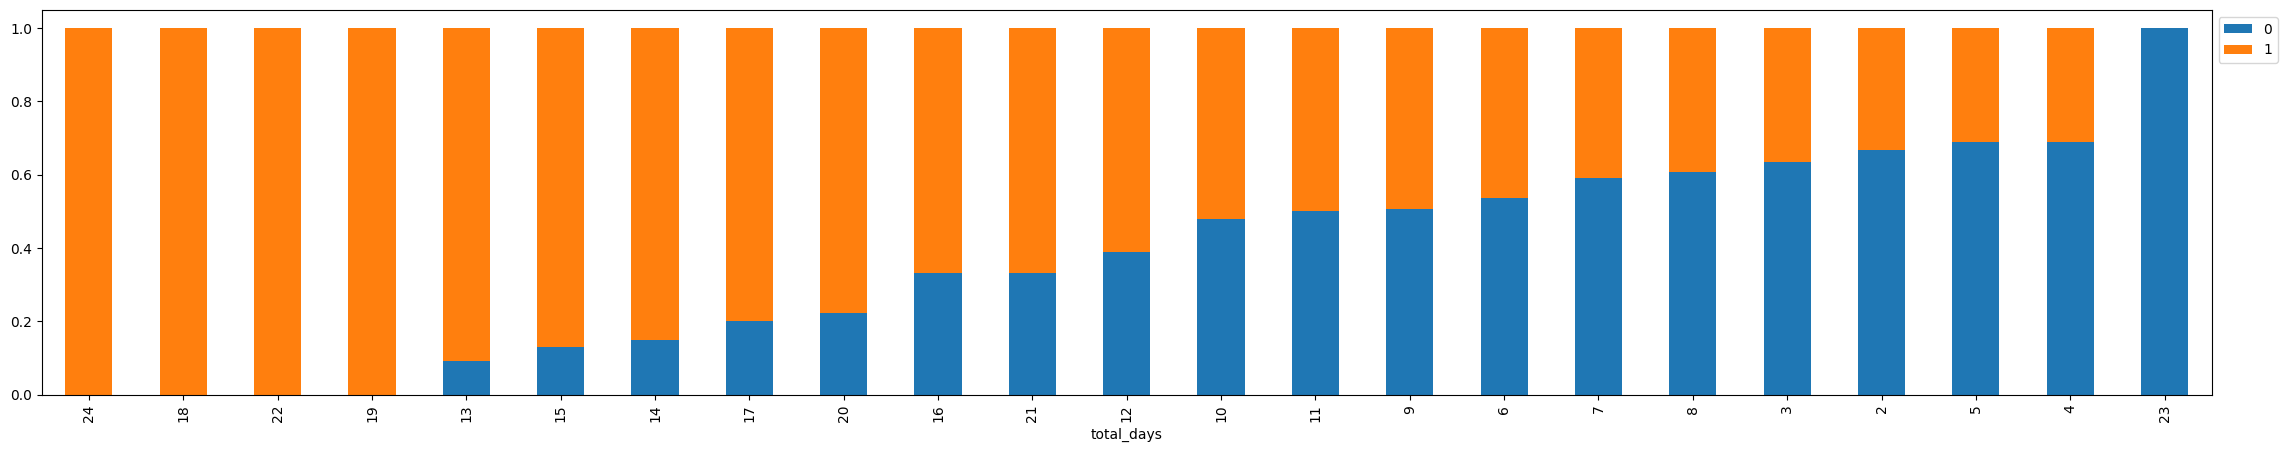

In [411]:
stacked_barplot(stay_data, "total_days", "booking_status") ## Complete the code to plot stacked barplot for total days and booking status

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0     1    All
repeated_guest                    
All             15817  7656  23473
0.0             15224  7645  22869
1.0               593    11    604
------------------------------------------------------------------------------------------------------------------------


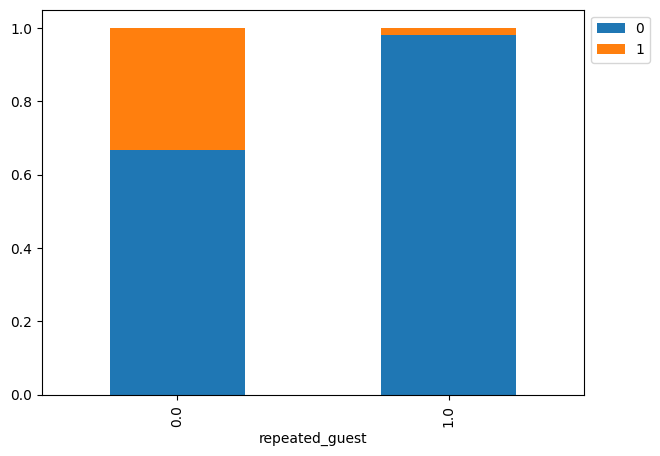

In [412]:
stacked_barplot(data, "repeated_guest", "booking_status" ) ## Complete the code to plot stacked barplot for repeated guests and booking status

This proves that most repeated guests have not cancelled their booking status, in which may indicate that there is a source of brand loyalty when it comes to repeated guests

**Let's find out what are the busiest months in the hotel.**

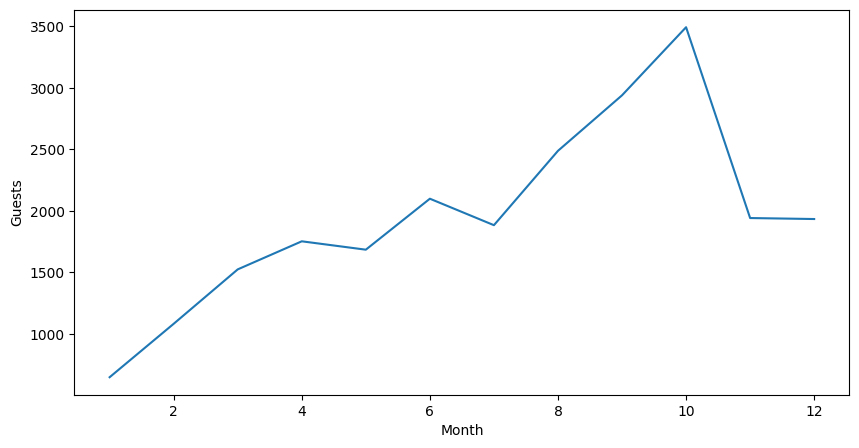

In [413]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

The most busiest month is in October then the amount of bookings decrease after December

**Let's check the percentage of bookings canceled in each month.**

booking_status      0     1    All
arrival_month                     
All             15817  7656  23473
10.0             2264  1228   3492
9.0              1974   965   2939
8.0              1525   963   2488
6.0              1261   838   2099
7.0              1048   836   1884
5.0              1066   619   1685
4.0              1135   618   1753
11.0             1370   572   1942
3.0              1071   454   1525
2.0               807   276   1083
12.0             1662   272   1934
1.0               634    15    649
------------------------------------------------------------------------------------------------------------------------


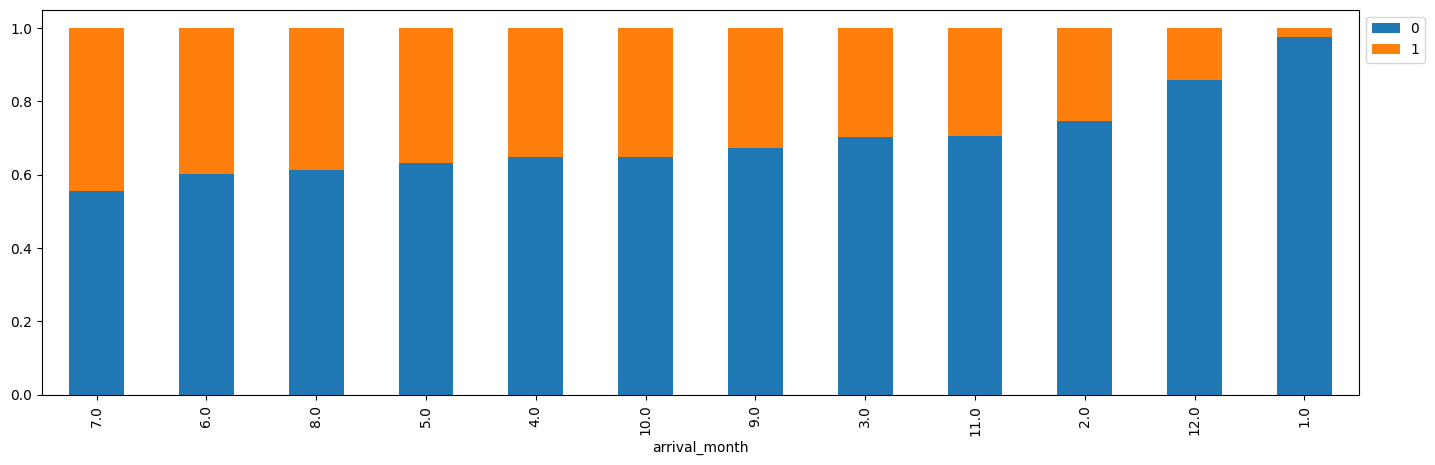

In [414]:
stacked_barplot(data, "arrival_month",  "booking_status") ## Complete the code to plot stacked barplot for arrival month and booking status

July has the most percentage of cancellations and January has the least.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

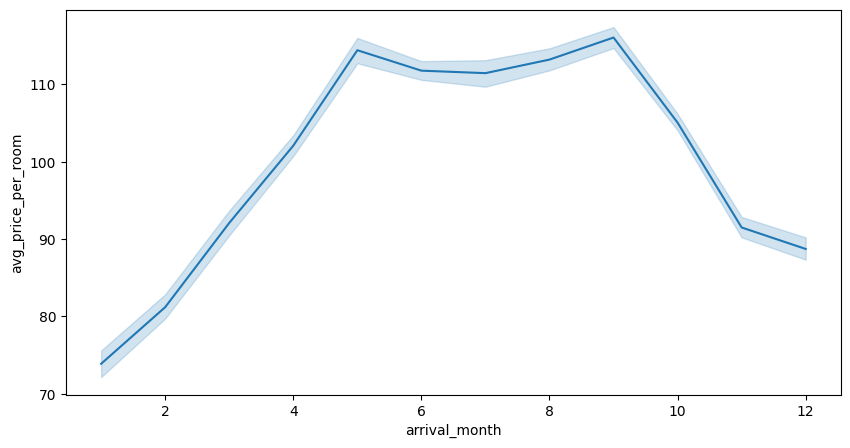

In [415]:
plt.figure(figsize=(10, 5))
sns.lineplot(data , x = "arrival_month", y = "avg_price_per_room") ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

The prices are the highest in the summer, since most people go on vacation then it peaks at around October

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

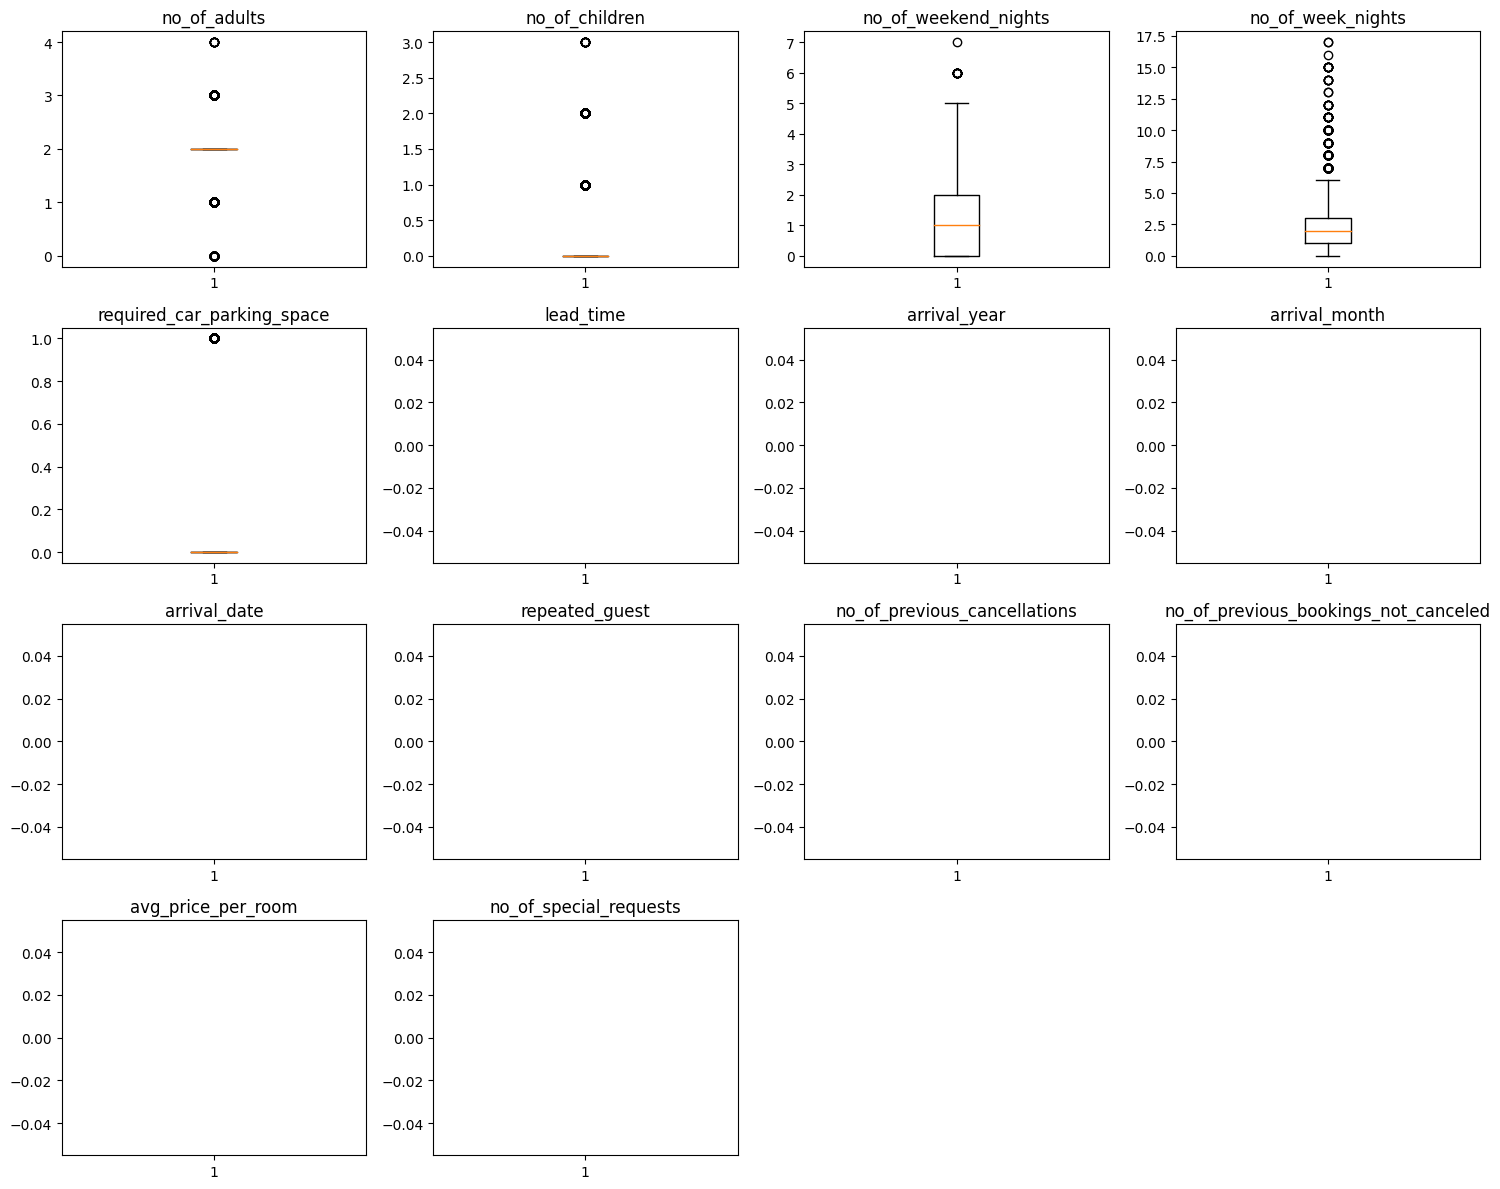

In [416]:
#Outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
#Dropping booking status
numerical_cols.remove('booking_status')
#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All of these seem to be part of the dataset, in which they do not need to be removed

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [417]:
#Computing different functions to check performance
def model_performance_classification_statsmodels(model,predictors,target,threshold=0.5):
    #Checking which probabilities are greater than the threshold
    pred_temp = model.predict(predictors)>threshold
    #Rounding off the variables
    pred = np.round(pred_temp)

    #Metrics being used for model performance
    acc = accuracy_score(target,pred) #To compute the accuracy score
    recall = recall_score(target,pred) #To compute the recall score
    precision = precision_score(target,pred) #To compute the precision score
    f1 = f1_score(target,pred) #To compute the f1 score

    #Creating a dataframe for the metrics
    df_perf = pd.DataFrame({'Accuracy':acc,'Recall':recall,'Precision':precision,'F1':f1,},index=[0],)

    return df_perf

In [418]:
#Computing the confusion matrix
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [479]:
#Independent and dependent variables being defined
x = data.drop(['booking_status'],axis=1)
y = data['booking_status']

#Adding constant
X = sm.add_constant(x)
X = pd.get_dummies(X,drop_first=True)

#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [480]:
print('Shape of the training set:',X_train.shape)
print('Shape of test set:', X_test.shape)
print('Percentage of Classes in Training Set:',y_train.value_counts(normalize=True))
print('Percentage of Classes in Test Set:',y_test.value_counts(normalize=True))

Shape of the training set: (16431, 28)
Shape of test set: (7043, 28)
Percentage of Classes in Training Set: 0   0.67373
1   0.32627
Name: booking_status, dtype: float64
Percentage of Classes in Test Set: 0   0.67414
1   0.32586
Name: booking_status, dtype: float64


#### Building Logistic Regression Model

In [481]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float).fillna(0)) # Fill any potential NaNs with 0
lg = logit.fit(disp = False) ## Complete the code to fit logistic regression

print(lg.summary()) ## Complete the code to print summary of the model

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                16431
Model:                          Logit   Df Residuals:                    16403
Method:                           MLE   Df Model:                           27
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.3379
Time:                        19:19:36   Log-Likelihood:                -6869.9
converged:                      False   LL-Null:                       -10376.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -816.8145    153.659     -5.316      0.000   -1117.980    -515.649
no_of_adults                             0.0470      

Since some of the coefficients are negative and some are positive, the negatives indicate that the probability of the person cancelling their hotel reservation is decreasing with that variable increasing, and the positives indicate that the probability of a person cancelling their hotel reservation increases with that variable increasing
There are also some high p-values that should be addressed in this model

In [482]:
#Training Performance
print('Training Performance')
# Ensure X_train is of type float and fill missing values
model_performance_classification_statsmodels(lg, X_train.astype(float).fillna(0), y_train)


Training Performance


,Accuracy,Recall,Precision,F1
0,0.81310,0.64148,0.74956,0.69133


Since we know that the f1 score seems pretty low, we can try to increase that by making adjustements to the currenc model accordingly. Let's start with reducing multicollinearity

#### Multicollinearity

In [483]:
#We will use VIF to fix the multicollienarity issue
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns

    #Calculating VIF for each feature
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range (len(predictors.columns))]

    return vif
    checking_vif(X_train)


There is no issue with multicollinearity with the main referenced variables, and the dummy variables which are from a single dataset that had 4 different categories, in which being the market segment, is a case scenario which can be exempt when checking for multicollinearity

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [484]:
# Check the data types of X_train and y_train
print("X_train types:\n", X_train.dtypes)
print("y_train type:", y_train.dtype)

# Convert X_train and y_train to numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaN values that might have been introduced by the conversion
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

# Verify the conversion and alignment
print("X_train types after conversion:\n", X_train.dtypes)
print("y_train type after conversion:", y_train.dtype)

# Ensure all columns are numeric
cols_to_keep = X_train.columns[X_train.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
X_train = X_train[cols_to_keep]

# Initial list of columns
cols = X_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = X_train[cols]

    # Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        # This 'else' block needs to be indented at the same level as the corresponding 'if'
        break

selected_features = cols
print("Selected features:", selected_features)

X_train types:
 const                                   float64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_

In [485]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [486]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                16430
Model:                          Logit   Df Residuals:                    16411
Method:                           MLE   Df Model:                           18
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.3362
Time:                        19:19:38   Log-Likelihood:                -6887.2
converged:                       True   LL-Null:                       -10376.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -795.7412    152.669     -5.212      0.000   -1094.968    -496.515
no_of_weekend_nights               0.1298      0.025      5.244      0.

In [487]:
print('Training Performance')
model_performance_classification_statsmodels(lg1,X_train1,y_train)

Training Performance


,Accuracy,Recall,Precision,F1
0,0.81053,0.64223,0.74235,0.68867


There is not a big change in the logistic regression as this caused the F1 score to reduce slightly

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [488]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.13861,1.06151,0.21943,1.01589,1.48143,0.95358,0.05402,1.37788,1.01923,0.21905,1.20926,1.27063,0.79584,0.44480,0.54095,0.25774,0.42024,0.13770
Change_odd%,-100.00000,13.86071,6.15136,-78.05748,1.58901,48.14276,-4.64156,-94.59800,37.78755,1.92342,-78.09467,20.92587,27.06301,-20.41615,-55.51981,-45.90477,-74.22566,-57.97578,-86.22982


#### Checking model performance on the training set

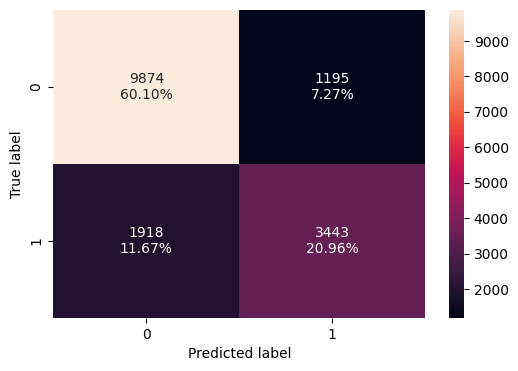

In [489]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [490]:
log_model_train_perf = model_performance_classification_statsmodels(lg1,X_train1,y_train)

#### ROC-AUC
* ROC-AUC on training set

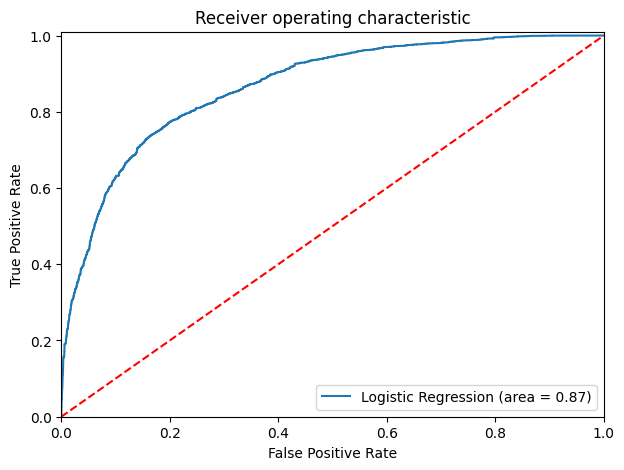

In [491]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The Model is giving a good performance so far

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [492]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.38688744256942004


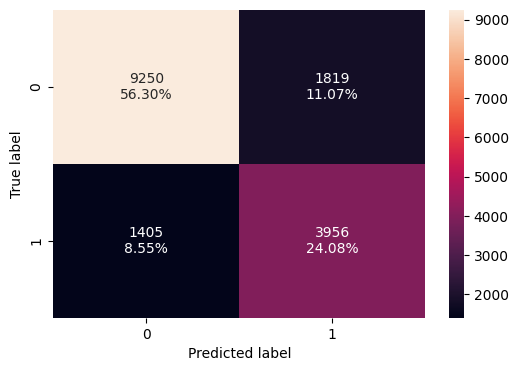

In [493]:
confusion_matrix_statsmodels(lg1,X_train1,y_train,threshold=optimal_threshold_auc_roc)

In [494]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80377,0.73792,0.68502,0.71049


You can see that using this threshold, the F1 score has improved drastically

#### Let's use Precision-Recall curve and see if we can find a better threshold

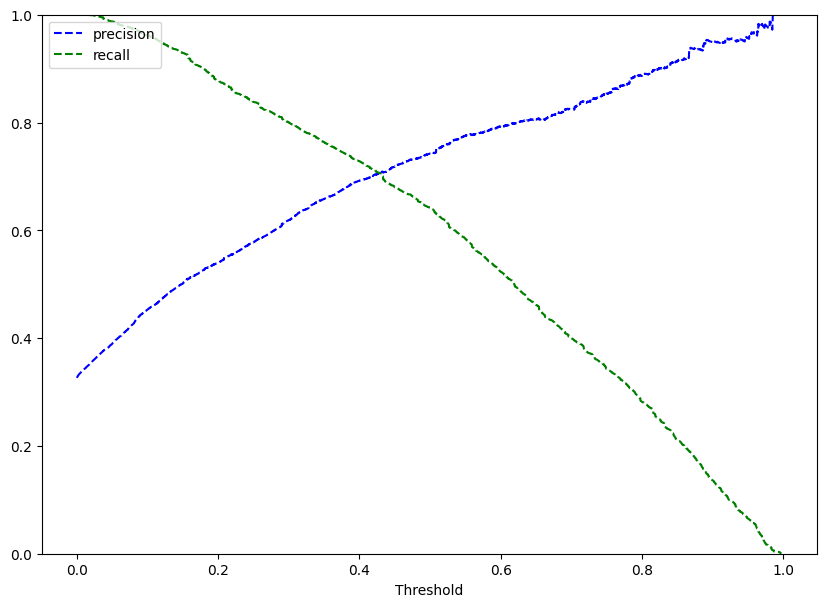

In [495]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At around 0.42, we get a threshold

In [496]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

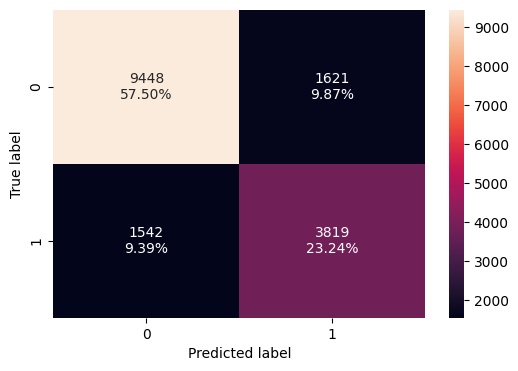

In [497]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train,threshold=optimal_threshold_curve,
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [498]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80749,0.71237,0.70202,0.70716


The f1 score is little less on this one then the previous method used

#### Let's check the performance on the test set

**Using model with default threshold**

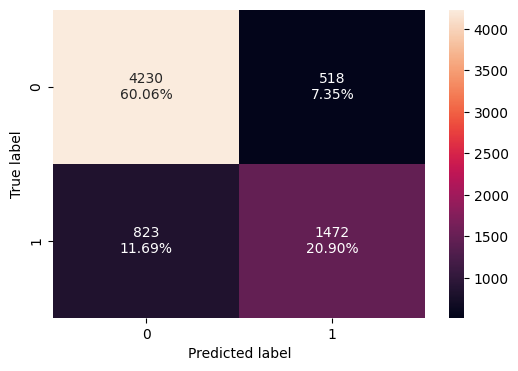

In [499]:
#Confusion Matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test)

In [500]:
#Metrics
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80960,0.64139,0.73970,0.68705


* ROC curve on test set

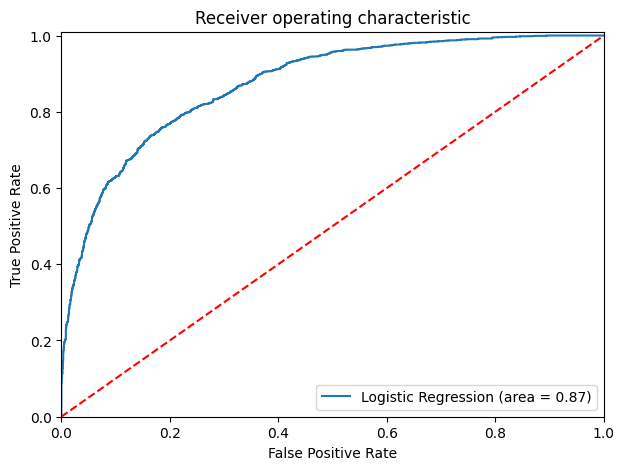

In [501]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Using 0.37

**Using model with threshold=0.37**

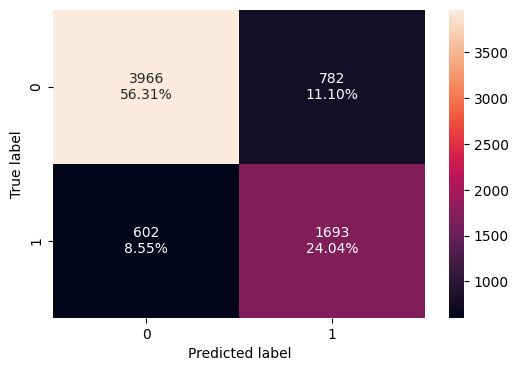

In [502]:
#Confusion Matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test,optimal_threshold_auc_roc)

In [503]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80349,0.73769,0.68404,0.70985


**Using model with threshold = 0.42**

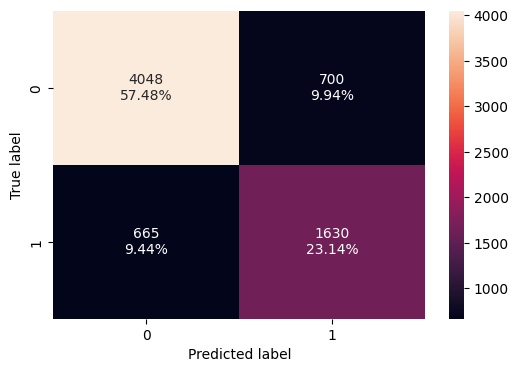

In [504]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test, optimal_threshold_curve) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [505]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80619,0.71024,0.69957,0.70486


#### Model performance summary

In [506]:
#Model Comparison Training Set
models_train_comp_df = pd.concat(
    [
        log_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.81053,0.80377,0.80749
Recall,0.64223,0.73792,0.71237
Precision,0.74235,0.68502,0.70202
F1,0.68867,0.71049,0.70716


In [507]:
#Model Comparison Test set
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80960,0.80349,0.80619
Recall,0.64139,0.73769,0.71024
Precision,0.73970,0.68404,0.69957
F1,0.68705,0.70985,0.70486


All models are not overfitting nor are underfitting with both the training data and test data
All models have similar f1 scores, but the best one will probably be the 0.37 threshold

### Decision Tree

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [508]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [509]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (16431, 27)
Shape of test set :  (7043, 27)
Percentage of classes in training set:
0   0.67373
1   0.32627
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67414
1   0.32586
Name: booking_status, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [510]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [511]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [512]:
 #Assuming X_train is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_train_imputed = imputer.fit_transform(X_train)

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [513]:
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train_imputed, y_train)  # Use the imputed data for training

DecisionTreeClassifier(random_state=1)

In [514]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train_imputed, y_train  # Pass the imputed data here
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99531,0.98806,0.99755,0.99278


You can see that this is a perfect F1_score, which is almost 100%. Let's see what it looks like with the test set

#### Checking model performance on test set

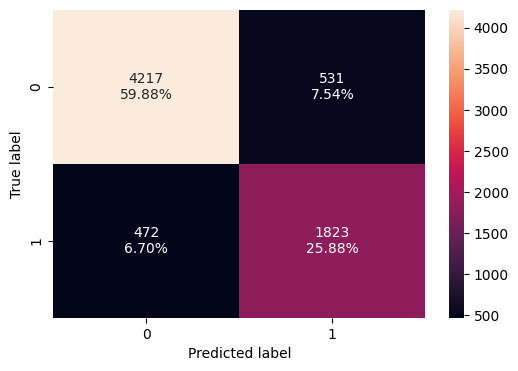

In [515]:
confusion_matrix_sklearn(model,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [516]:
decision_tree_perf_test_default = model_performance_classification_sklearn(model,X_test,y_test) ## Complete the code to check performance on test set
decision_tree_perf_test_default

,Accuracy,Recall,Precision,F1
0,0.85759,0.79434,0.77443,0.78425


You can see that the F1 score is even less in the test set, which indicates overfitting

**Before pruning the tree let's check the important features.**

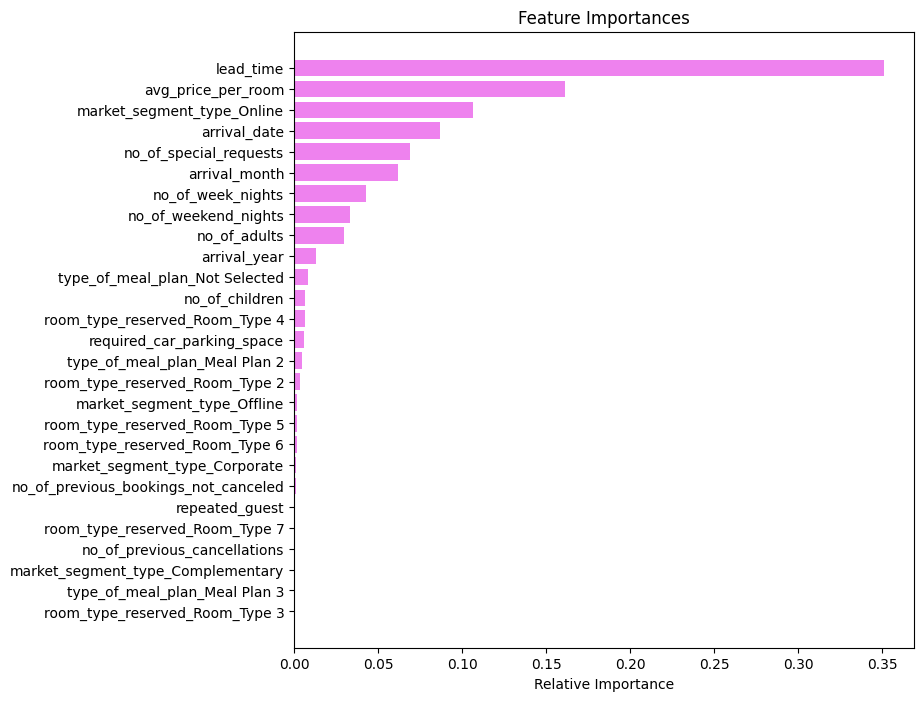

In [517]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the graph, lead time is the most important feature for predicting customer default

#### Pruning the tree

**Pre-Pruning**

In [518]:
# Assuming X_train is your training data with missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_train_imputed = imputer.fit_transform(X_train)

#Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

#Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

#Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_imputed, y_train)  # Use imputed data

#Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
estimator.fit(X_train_imputed, y_train)  # Use imputed data

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

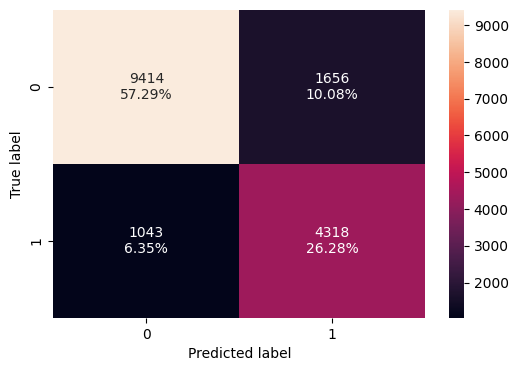

In [520]:
X_train_imputed = imputer.transform(X_train)  # Use the same imputer fitted earlier

confusion_matrix_sklearn(estimator, X_train_imputed, y_train)  # Use imputed data for prediction

In [522]:

# Impute missing values in X_train before prediction
X_train_imputed = imputer.transform(X_train)

# Evaluate performance on imputed data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train_imputed, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83574,0.80545,0.72280,0.76189


This has reduced the f1 score for the training set

#### Checking performance on test set

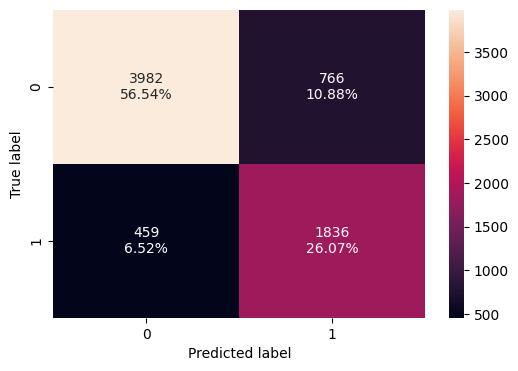

In [523]:
confusion_matrix_sklearn(estimator,X_test,y_test) ## Complete the code to create confusion matrix for test data

In [524]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.82607,0.80000,0.70561,0.74985


Overfitting has been almost eliminated after pre-pruning

#### Visualizing the Decision Tree

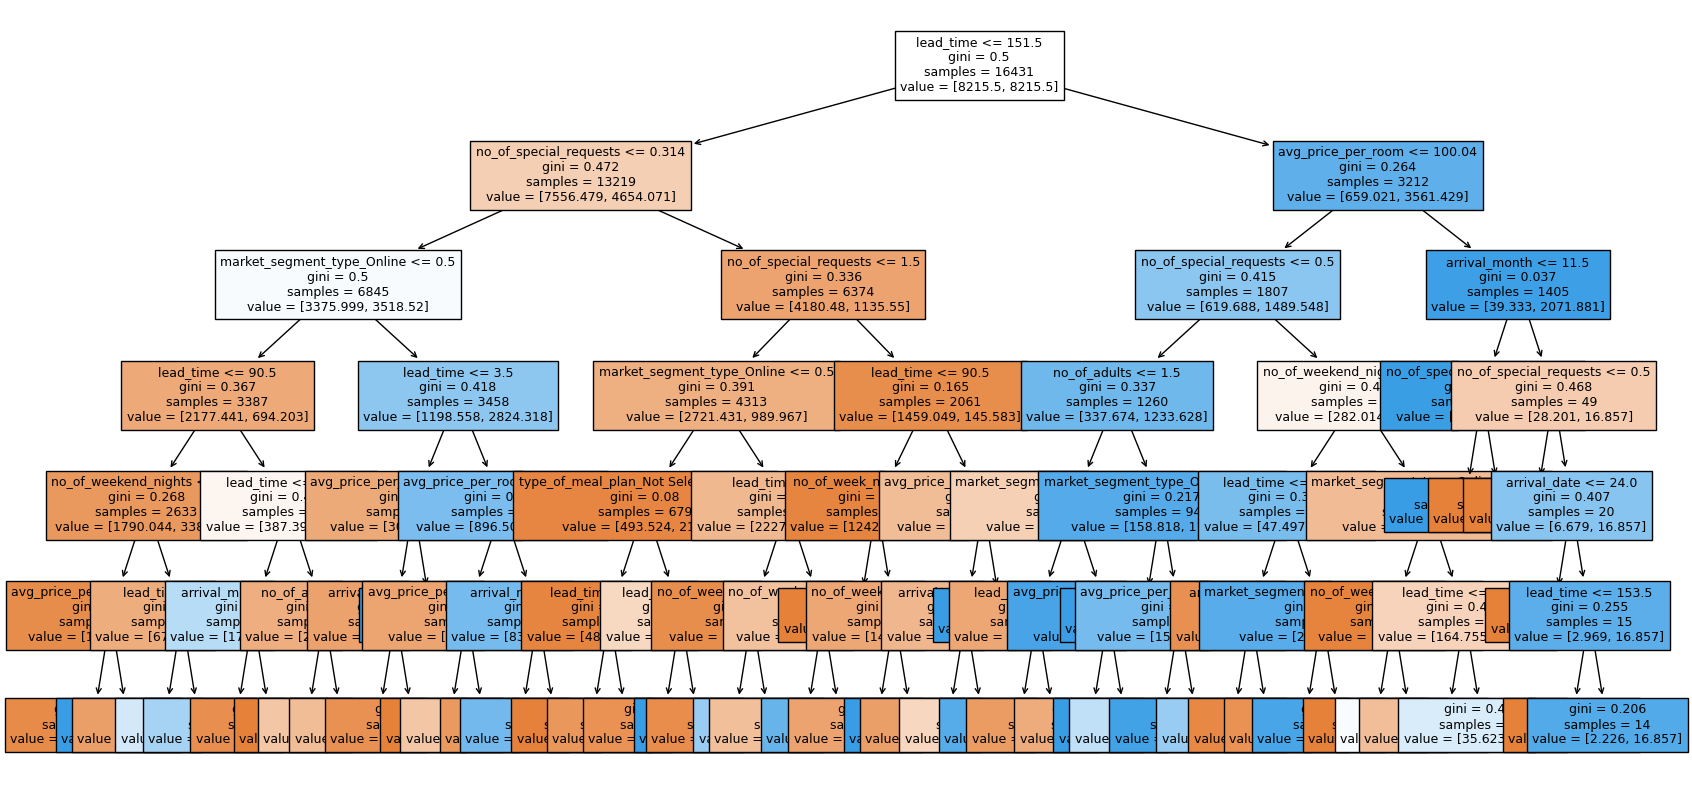

In [525]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [526]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.31
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 192.69
|   |   |   |   |   |   |--- weights: [1116.18, 91.95] class: 0
|   |   |   |   |   |--- avg_price_per_room >  192.69
|   |   |   |   |   |   |--- weights: [0.00, 13.79] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [603.36, 142.52] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [70.50, 90.41] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 116.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [152.14, 277.37] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [26.72, 3.06] class: 0
|   | 

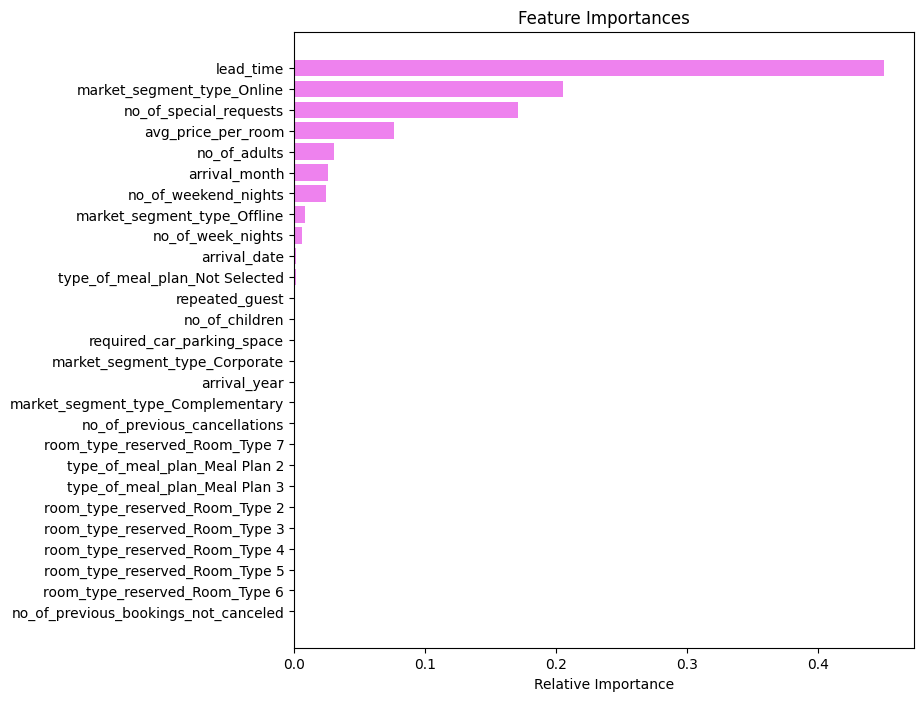

In [527]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In Comparison to the default importance graph, we can see that lead time still has the utmost importance, but market segment from online is givng the second amount of importance now and in the default it was the average price

**Cost Complexity Pruning**

In [530]:
# Assuming X_train is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)

clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train_imputed, y_train)  # Use imputed data
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [531]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00657
1,0.00000,0.00657
2,0.00000,0.00657
3,0.00000,0.00657
4,0.00000,0.00657
...,...,...
1308,0.00684,0.32187
1309,0.00972,0.33159
1310,0.01129,0.34288
1311,0.03769,0.41827


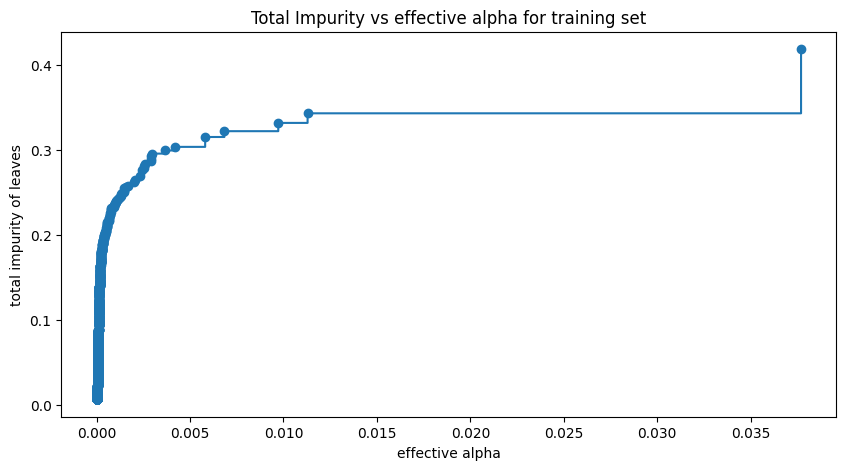

In [532]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [536]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_imputed, y_train) ## Use the imputed data X_train_imputed here
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08173215343840434


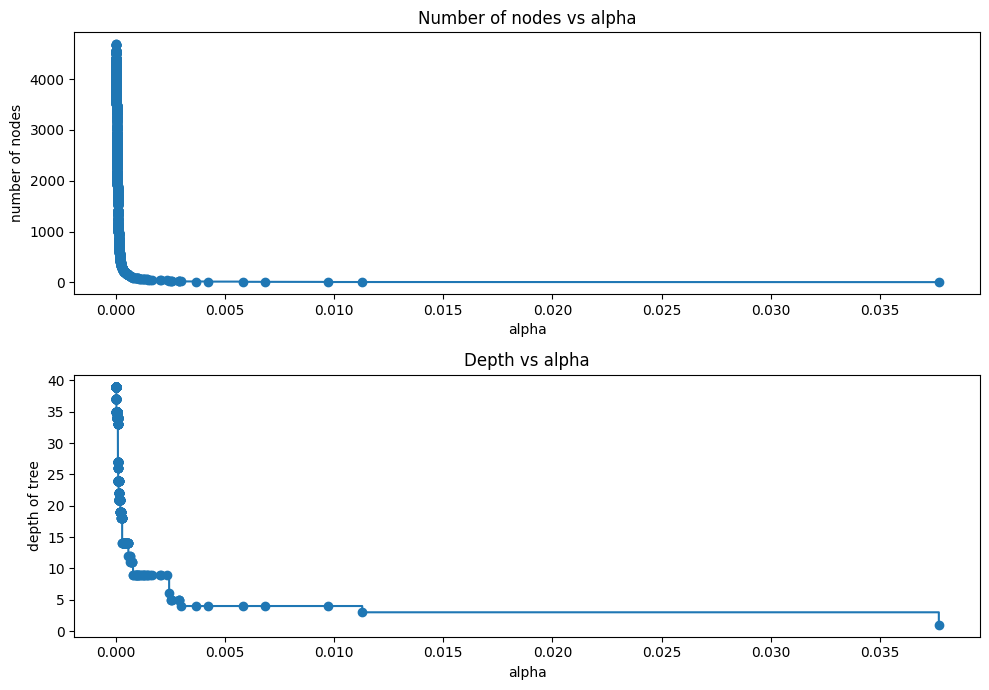

In [537]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [543]:
imputer = SimpleImputer(strategy='mean') # Or any strategy you prefer
X_test_imputed = imputer.fit_transform(X_test)

f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train_imputed) # Use imputed data for prediction
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_imputed) # Now X_test_imputed is defined
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

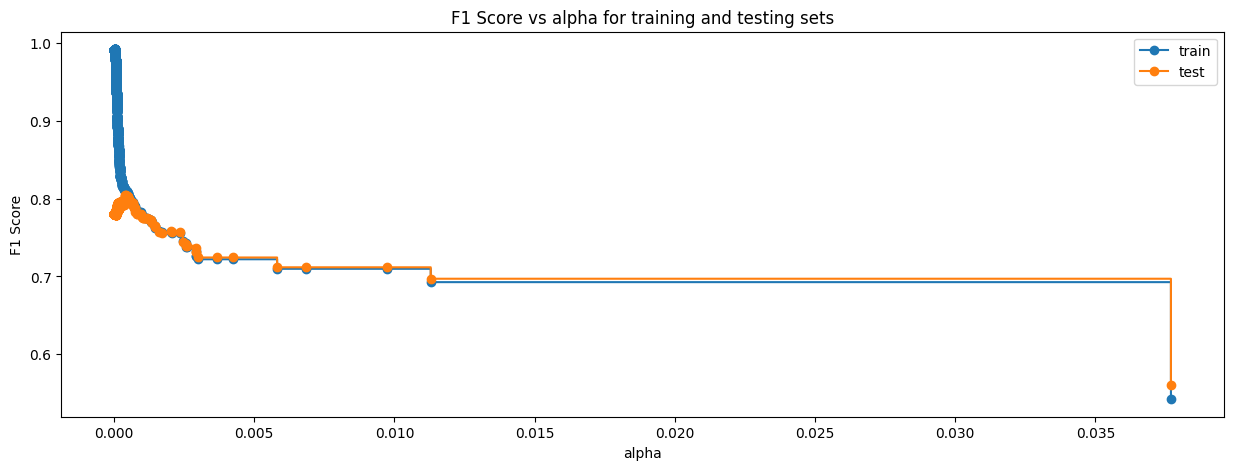

In [544]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [545]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0004037856222469741, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

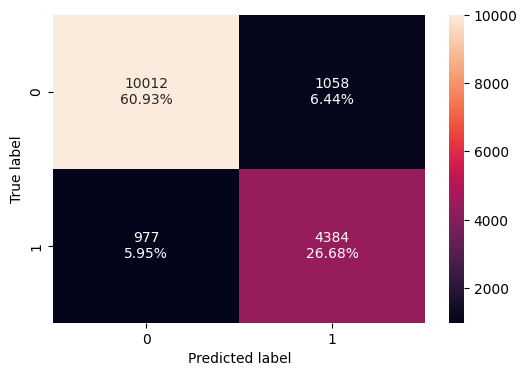

In [548]:
mputer = SimpleImputer(strategy='mean') # Or any strategy you prefer
X_train_imputed = imputer.fit_transform(X_train) # Impute missing values in X_train
X_test_imputed = imputer.transform(X_test) # Impute missing values in X_test (use transform, not fit_transform)

# ... (rest of your code)

confusion_matrix_sklearn(best_model, X_train_imputed, y_train) # Use imputed X_train

In [550]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train_imputed, y_train # Use X_train_imputed here
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.87615,0.81776,0.80559,0.81163


The F-1 score has increased significantly after cost complex pruning

#### Checking performance on test set

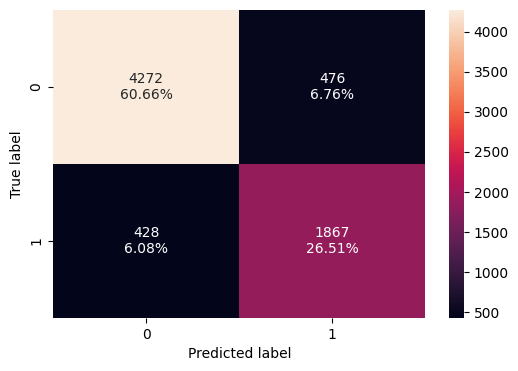

In [551]:
#Confusion Matrix
confusion_matrix_sklearn(best_model, X_test, y_test)## Complete the code to create confusion matrix for test data on best model

In [553]:
#Metrics
decision_tree_test =  model_performance_classification_sklearn(best_model,X_train_imputed,y_train) # Use X_train_imputed
decision_tree_test

,Accuracy,Recall,Precision,F1
0,0.87615,0.81776,0.80559,0.81163


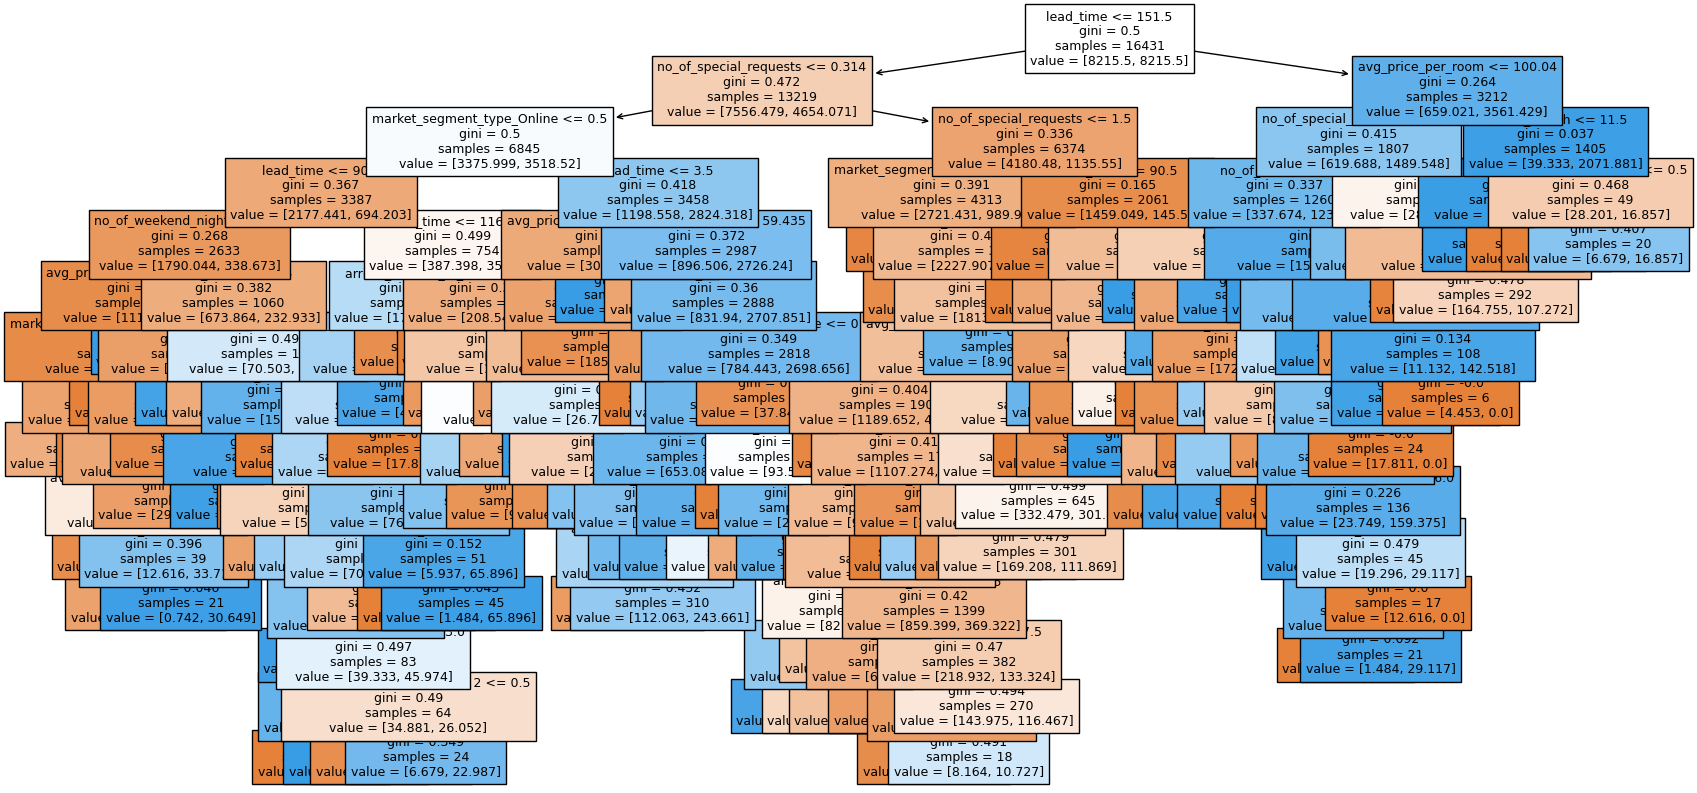

In [554]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [555]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.31
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 192.69
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [257.52, 91.95] class: 0
|   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |--- weights: [84.60, 0.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [774.05, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  192.69
|   |   |   |   |   |   |--- weights: [0.00, 13.79] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |   |---

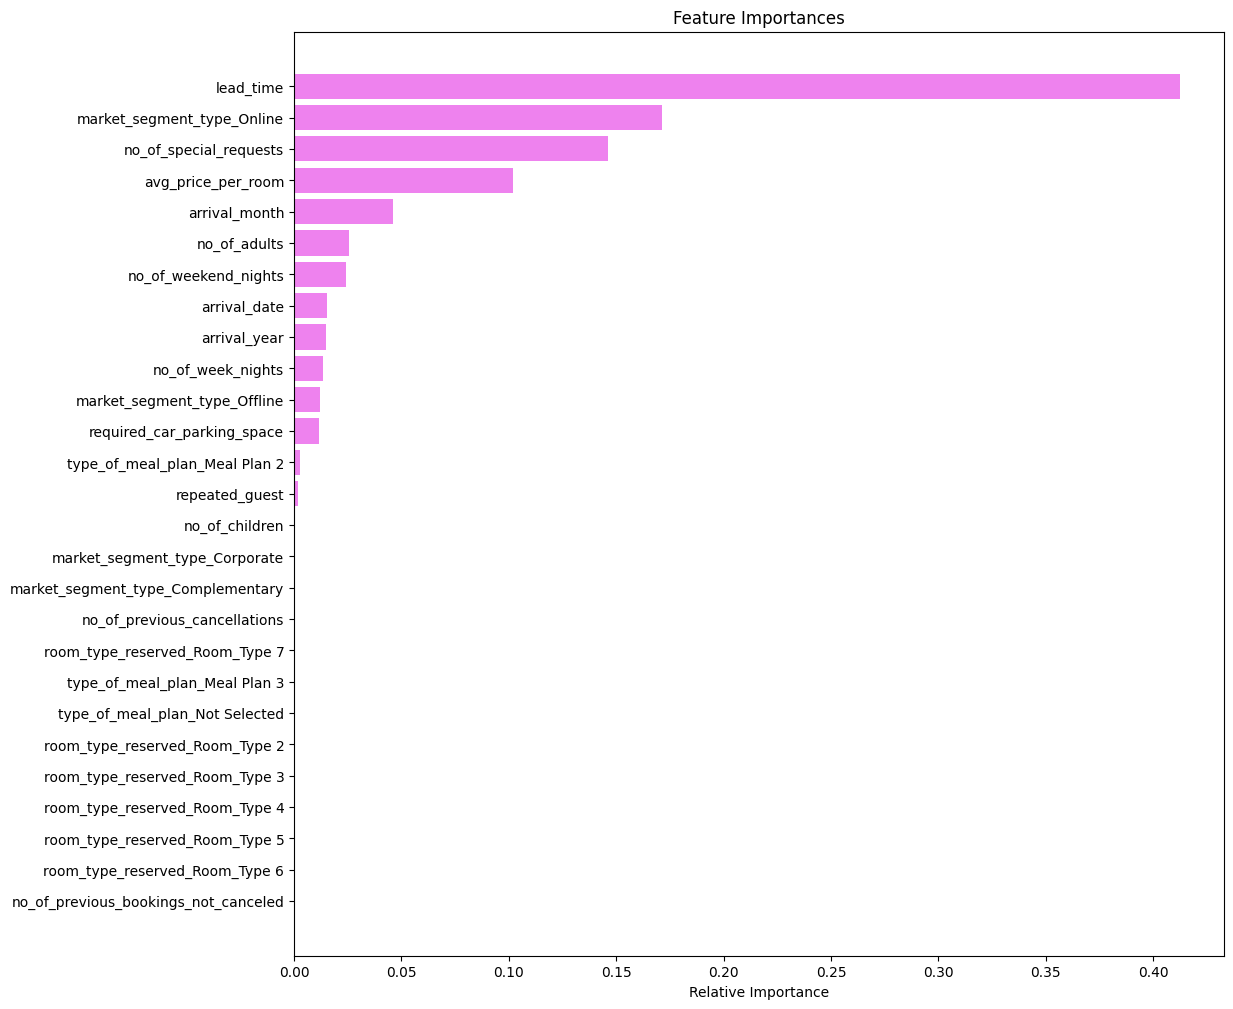

In [556]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This one gives relative importance to the idea of lead time, just like the default version of the decision tree

#### Comparing Decision Tree models

In [557]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99531,0.83574,0.87615
Recall,0.98806,0.80545,0.81776
Precision,0.99755,0.72280,0.80559
F1,0.99278,0.76189,0.81163


In [558]:
#Testing performance comparison
models_test_comp_df = pd.concat(
[
    decision_tree_perf_test_default.T,
    decision_tree_tune_perf_test.T,
    decision_tree_test.T,

],
axis=1,)

models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.85759,0.82607,0.87615
Recall,0.79434,0.80000,0.81776
Precision,0.77443,0.70561,0.80559
F1,0.78425,0.74985,0.81163


We know that the decision tree default was prone to overfitting, hence wy the F1 score in the training set is greater than the test set, and pre pruning fixed that overfitting. The post pruning method decision tree ended up with the highest F1 score which makes it the best choice

### Business Recommendations

To reduce the likelihood of cancellations, consider implementing the following strategies:

Launch a Marketing Campaign: Organize a raffle offering a free room stay, encouraging bookings and reducing cancellations.

Enhance Customer Service: Train staff to address special requests effectively. Improved customer service and employee satisfaction can lead to better accommodations and a higher likelihood of meeting customer needs.

Strategic Pricing: Keep prices competitive during peak months to attract more guests and minimize cancellations.

Build Brand Loyalty: Introduce rewards programs, such as loyalty cards and complimentary breakfasts, to encourage repeat business and customer retention.

Family-Friendly Amenities: Create a kid's room to attract families. Accommodating parents with children can make their stay more comfortable and reduce the chance of cancellations.

In [560]:
!jupyter nbconvert --to html /content/sample_data/project4.ipynb

[NbConvertApp] Converting notebook /content/sample_data/project4.ipynb to html
[NbConvertApp] Writing 824592 bytes to /content/sample_data/project4.html
